# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# Project Overview
**Overview:**
The project is for Tasty Bytes, a company providing meal plans and recipe discovery services. The product manager wants to improve the selection of recipes displayed on the homepage, as selecting a popular recipe can increase traffic to the website by up to 40%, boosting subscriptions.

**Goals:**
1. **Prediction:**
   - Predict which recipes are likely to lead to high traffic.
   - Achieve a prediction accuracy of at least 80%.

2. **Minimizing Unpopularity:**
   - Minimize the chances of displaying recipes that are unlikely to drive traffic.

3. **Recommendations:**
   - Provide actionable insights on how the product team should proceed based on the analysis and model results.

**Deliverables:**
- A written report summarizing analysis, findings, and recommendations.
- A presentation summarizing the project, including:
  - Overview of the project and business goals.
  - Summary of work undertaken and its relevance.
  - Key findings, including a proposed metric and its initial value.
  - Final recommendations for the business. 

In [28]:
# Start coding here...
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import libraries for ML
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report  
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler


# ML models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")


# Load the dataset
data = pd.read_csv('recipe_site_traffic_2212.csv' )
data.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


In [29]:
# Step 1: Data Validation and Cleaning
# -------------------------------------
# Display dataset overview
print("Initial data overview:\n")
print(data.info())
print(data.describe(include='all'))

Initial data overview:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
            recipe     calories  carbohydrate  ...   category  servings high_traffic
count   947.000000   895.000000    895.000000  ...        947       947          574
unique         NaN          NaN           NaN  ...         11         6            1
top            NaN          NaN           NaN  ...  Breakfast         4         High
freq           NaN          NaN   

In [30]:
# Check the value counts for the 'servings' column to see how many recipes have each number of servings
print(data['servings'].value_counts())

4               389
6               197
2               183
1               175
4 as a snack      2
6 as a snack      1
Name: servings, dtype: int64


In [31]:
# Seeing entries with "as a snack" in their servings value, let's replace them with just the numeric value
data['servings'] = data['servings'].str.replace(" as a snack", "")

# Recheck the value counts for servings to confirm the replacement worked
print(data['servings'].value_counts())

4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [32]:
# The 'servings' data seems to be numerical now, so let's convert it to integer data type
data['servings'] = data['servings'].astype('int')

# Check the value counts for the 'high_traffic' column to see how many recipes are classified as high traffic
print(data['high_traffic'].value_counts())


High    574
Name: high_traffic, dtype: int64


In [33]:
# In this dataset, 'High' is the only value for high traffic. We can convert this column to boolean (True for High, False for missing values)
data['high_traffic'] = np.where(data['high_traffic'] == "High", True, False)

# Check the value counts for high_traffic to see the distribution after conversion
print(data['high_traffic'].value_counts())

True     574
False    373
Name: high_traffic, dtype: int64


In [34]:
# Check the value counts for the 'category' column to see the recipe categories
print(data['category'].value_counts())

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64


In [35]:
# There's a category 'Chicken Breast' that might not be intended. Let's replace it with 'Chicken'
data['category'] = data['category'].str.replace(" Breast", "")

# Recheck the value counts for category to see the correction
print(data['category'].value_counts())

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Vegetable         83
Dessert           83
Meat              79
One Dish Meal     71
Name: category, dtype: int64


In [36]:
# Finally, convert the 'category' column to category data type
data['category'] = data['category'].astype('category')

# Check the summary of the dataframe to see the data types of each column
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB
None


In [37]:
# Check for missing values in each column
print(data.isna().sum())

recipe           0
calories        52
carbohydrate    52
sugar           52
protein         52
category         0
servings         0
high_traffic     0
dtype: int64


In [38]:
# If there are missing values, we can drop those rows (assuming they're not important for the analysis)
data = data.dropna().reset_index(drop=True)

# Recheck for missing values to confirm they're gone
print(data.isna().sum())

# Check the summary of the dataframe again to see any data type changes due to dropping missing values
print(data.info())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 895 entries, 0 to 894
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        895 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      895 non-null    category
 6   servings      895 non-null    int64   
 7   high_traffic  895 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 44.2 KB
None


In [39]:
# Data cleaning and validation are complete. Now we can move on to exploratory data analysis

# Generate descriptive statistics for numerical columns (calories, carbohydrates etc.)
print(data.describe())

           recipe     calories  ...     protein    servings
count  895.000000   895.000000  ...  895.000000  895.000000
mean   473.652514   435.939196  ...   24.149296    3.458101
std    272.763283   453.020997  ...   36.369739    1.735979
min      2.000000     0.140000  ...    0.000000    1.000000
25%    237.500000   110.430000  ...    3.195000    2.000000
50%    475.000000   288.550000  ...   10.800000    4.000000
75%    708.500000   597.650000  ...   30.200000    4.000000
max    947.000000  3633.160000  ...  363.360000    6.000000

[8 rows x 6 columns]


### Analyze the descriptive statistics. There might be outliers and non-normal distribution based on high standard deviation and quantile values.
Analyze the results to understand data distribution.

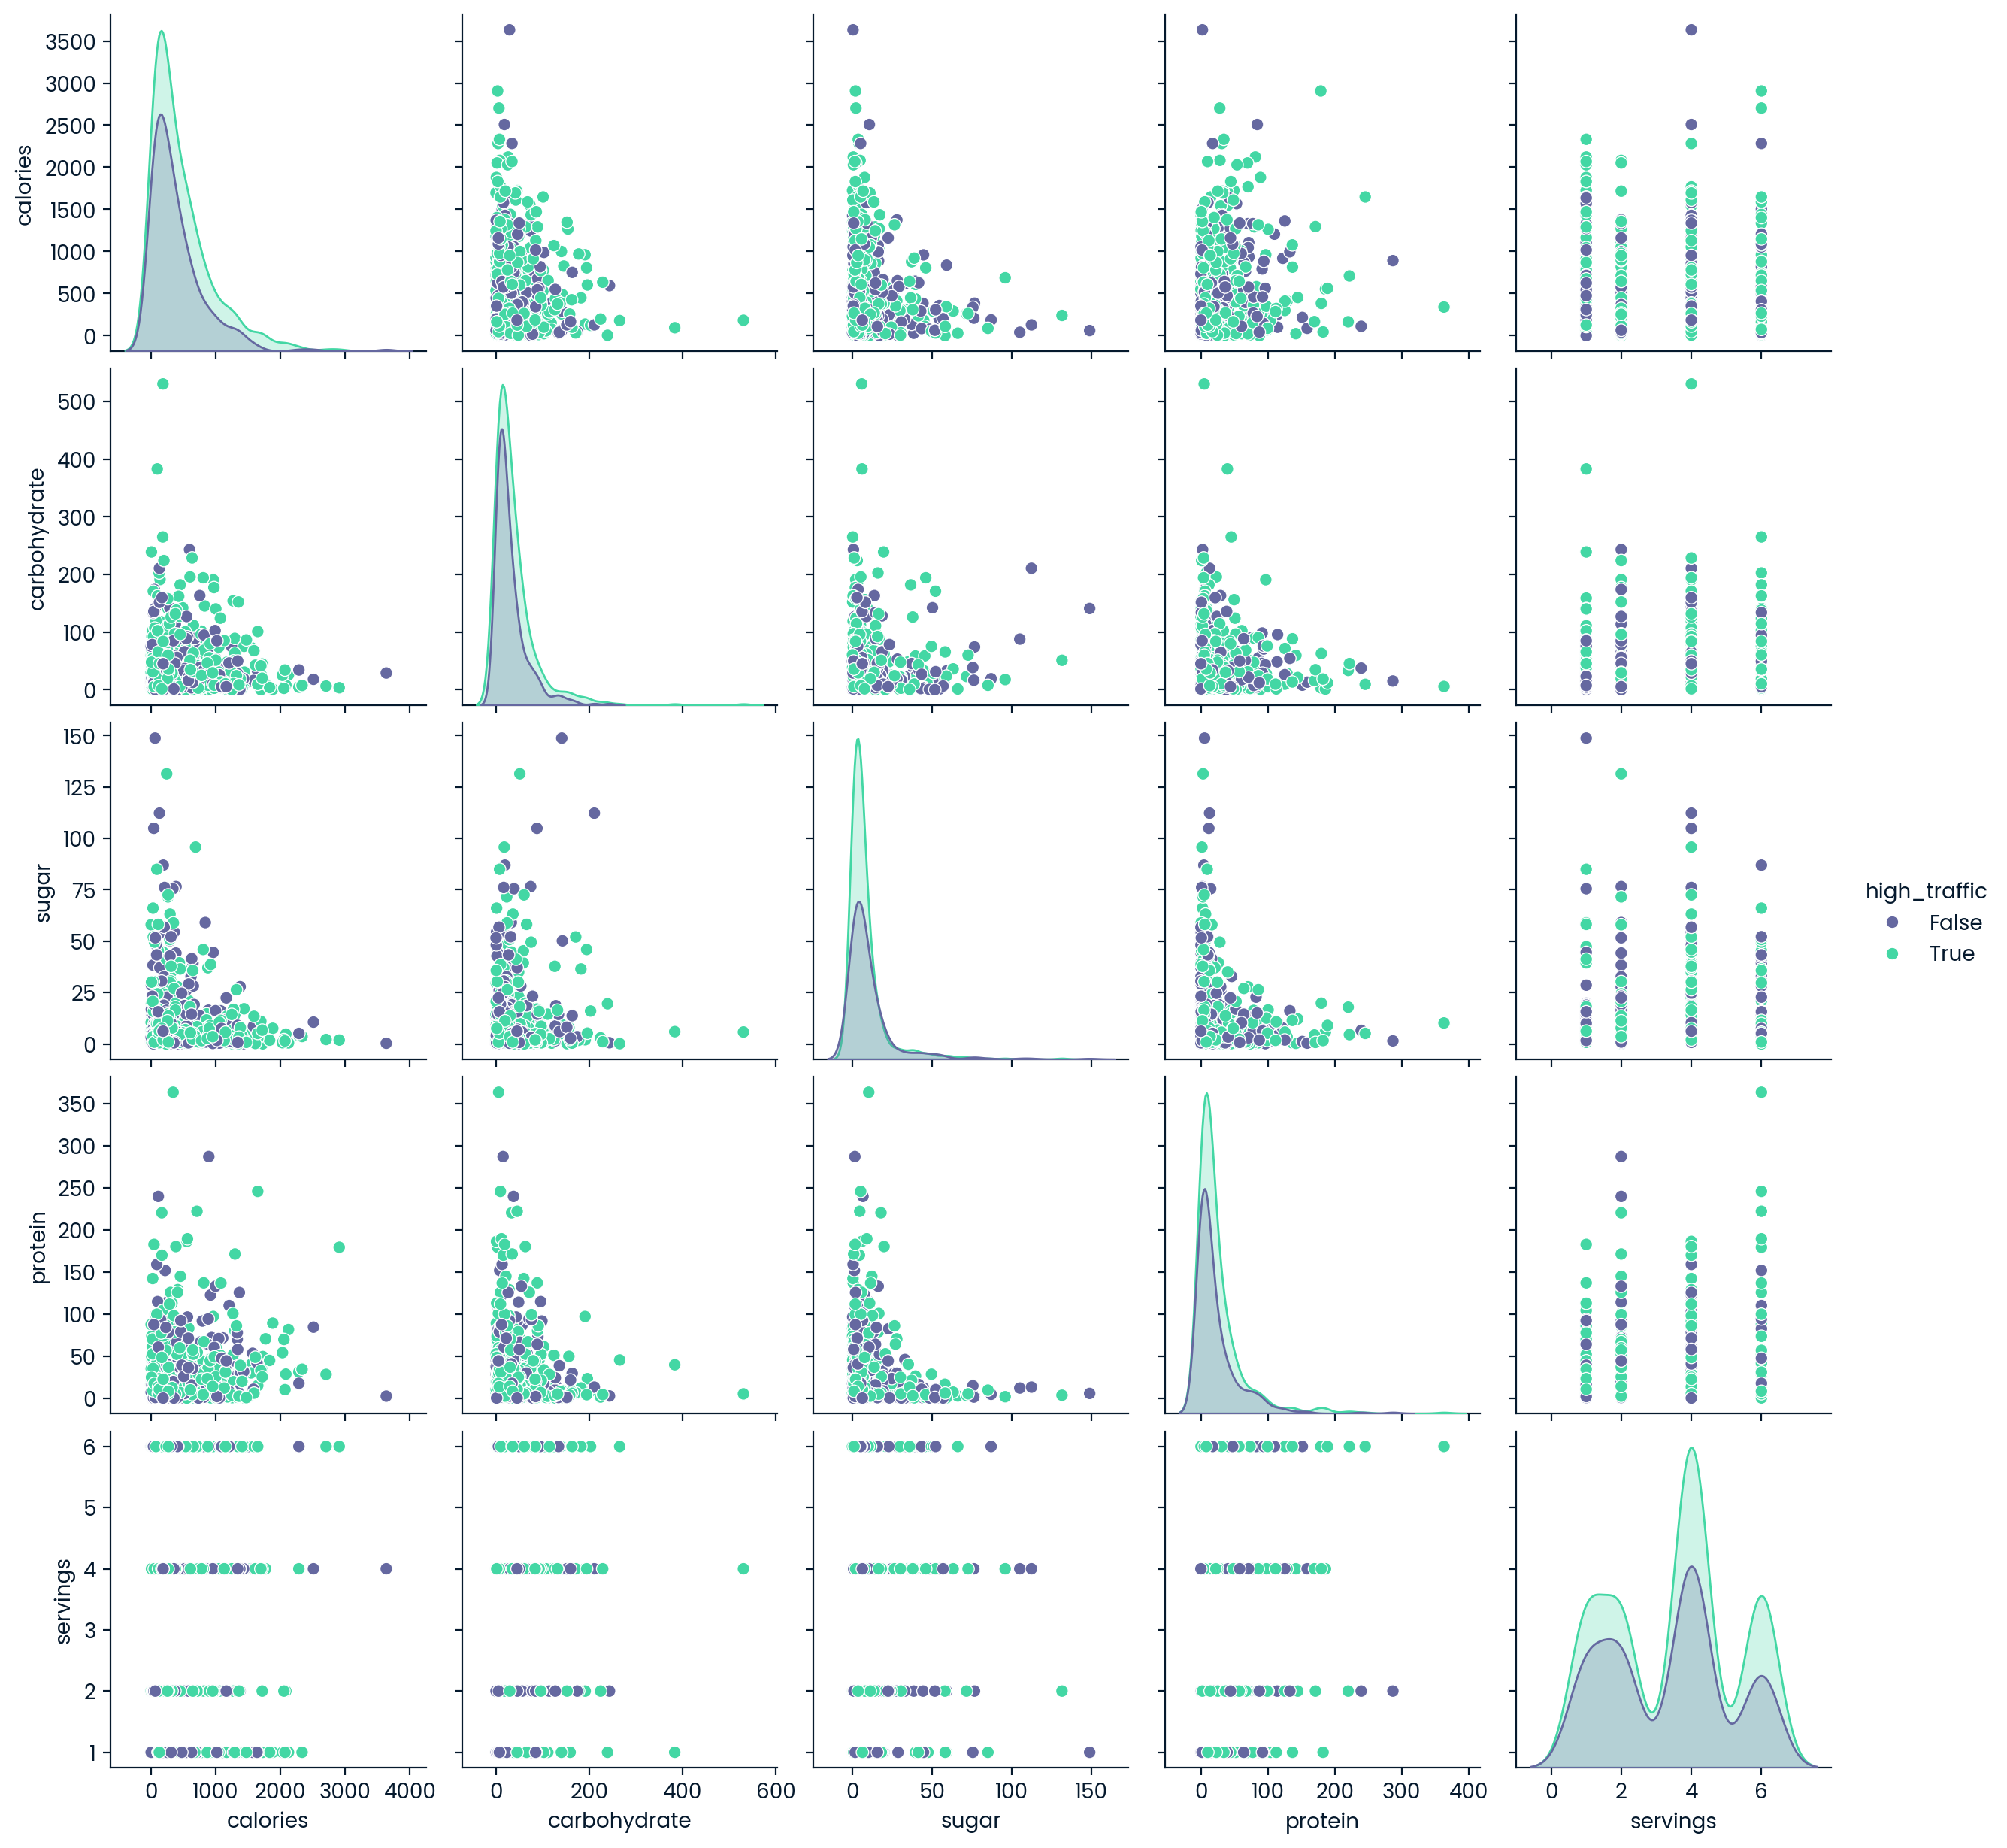

In [40]:
# Step 2: Exploratory Data Analysis(EDA)
# -------------------------------------
# We can filter necessary columns for further analysis and use seaborn for visualizations
# Analyze the pairplot to see if there are correlations between these columns:
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']
sns.pairplot(data[filtered_columns], hue='high_traffic')
plt.show()

## Since the plots don't show strong correlations, let's look at calorie distribution with a histogram.

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

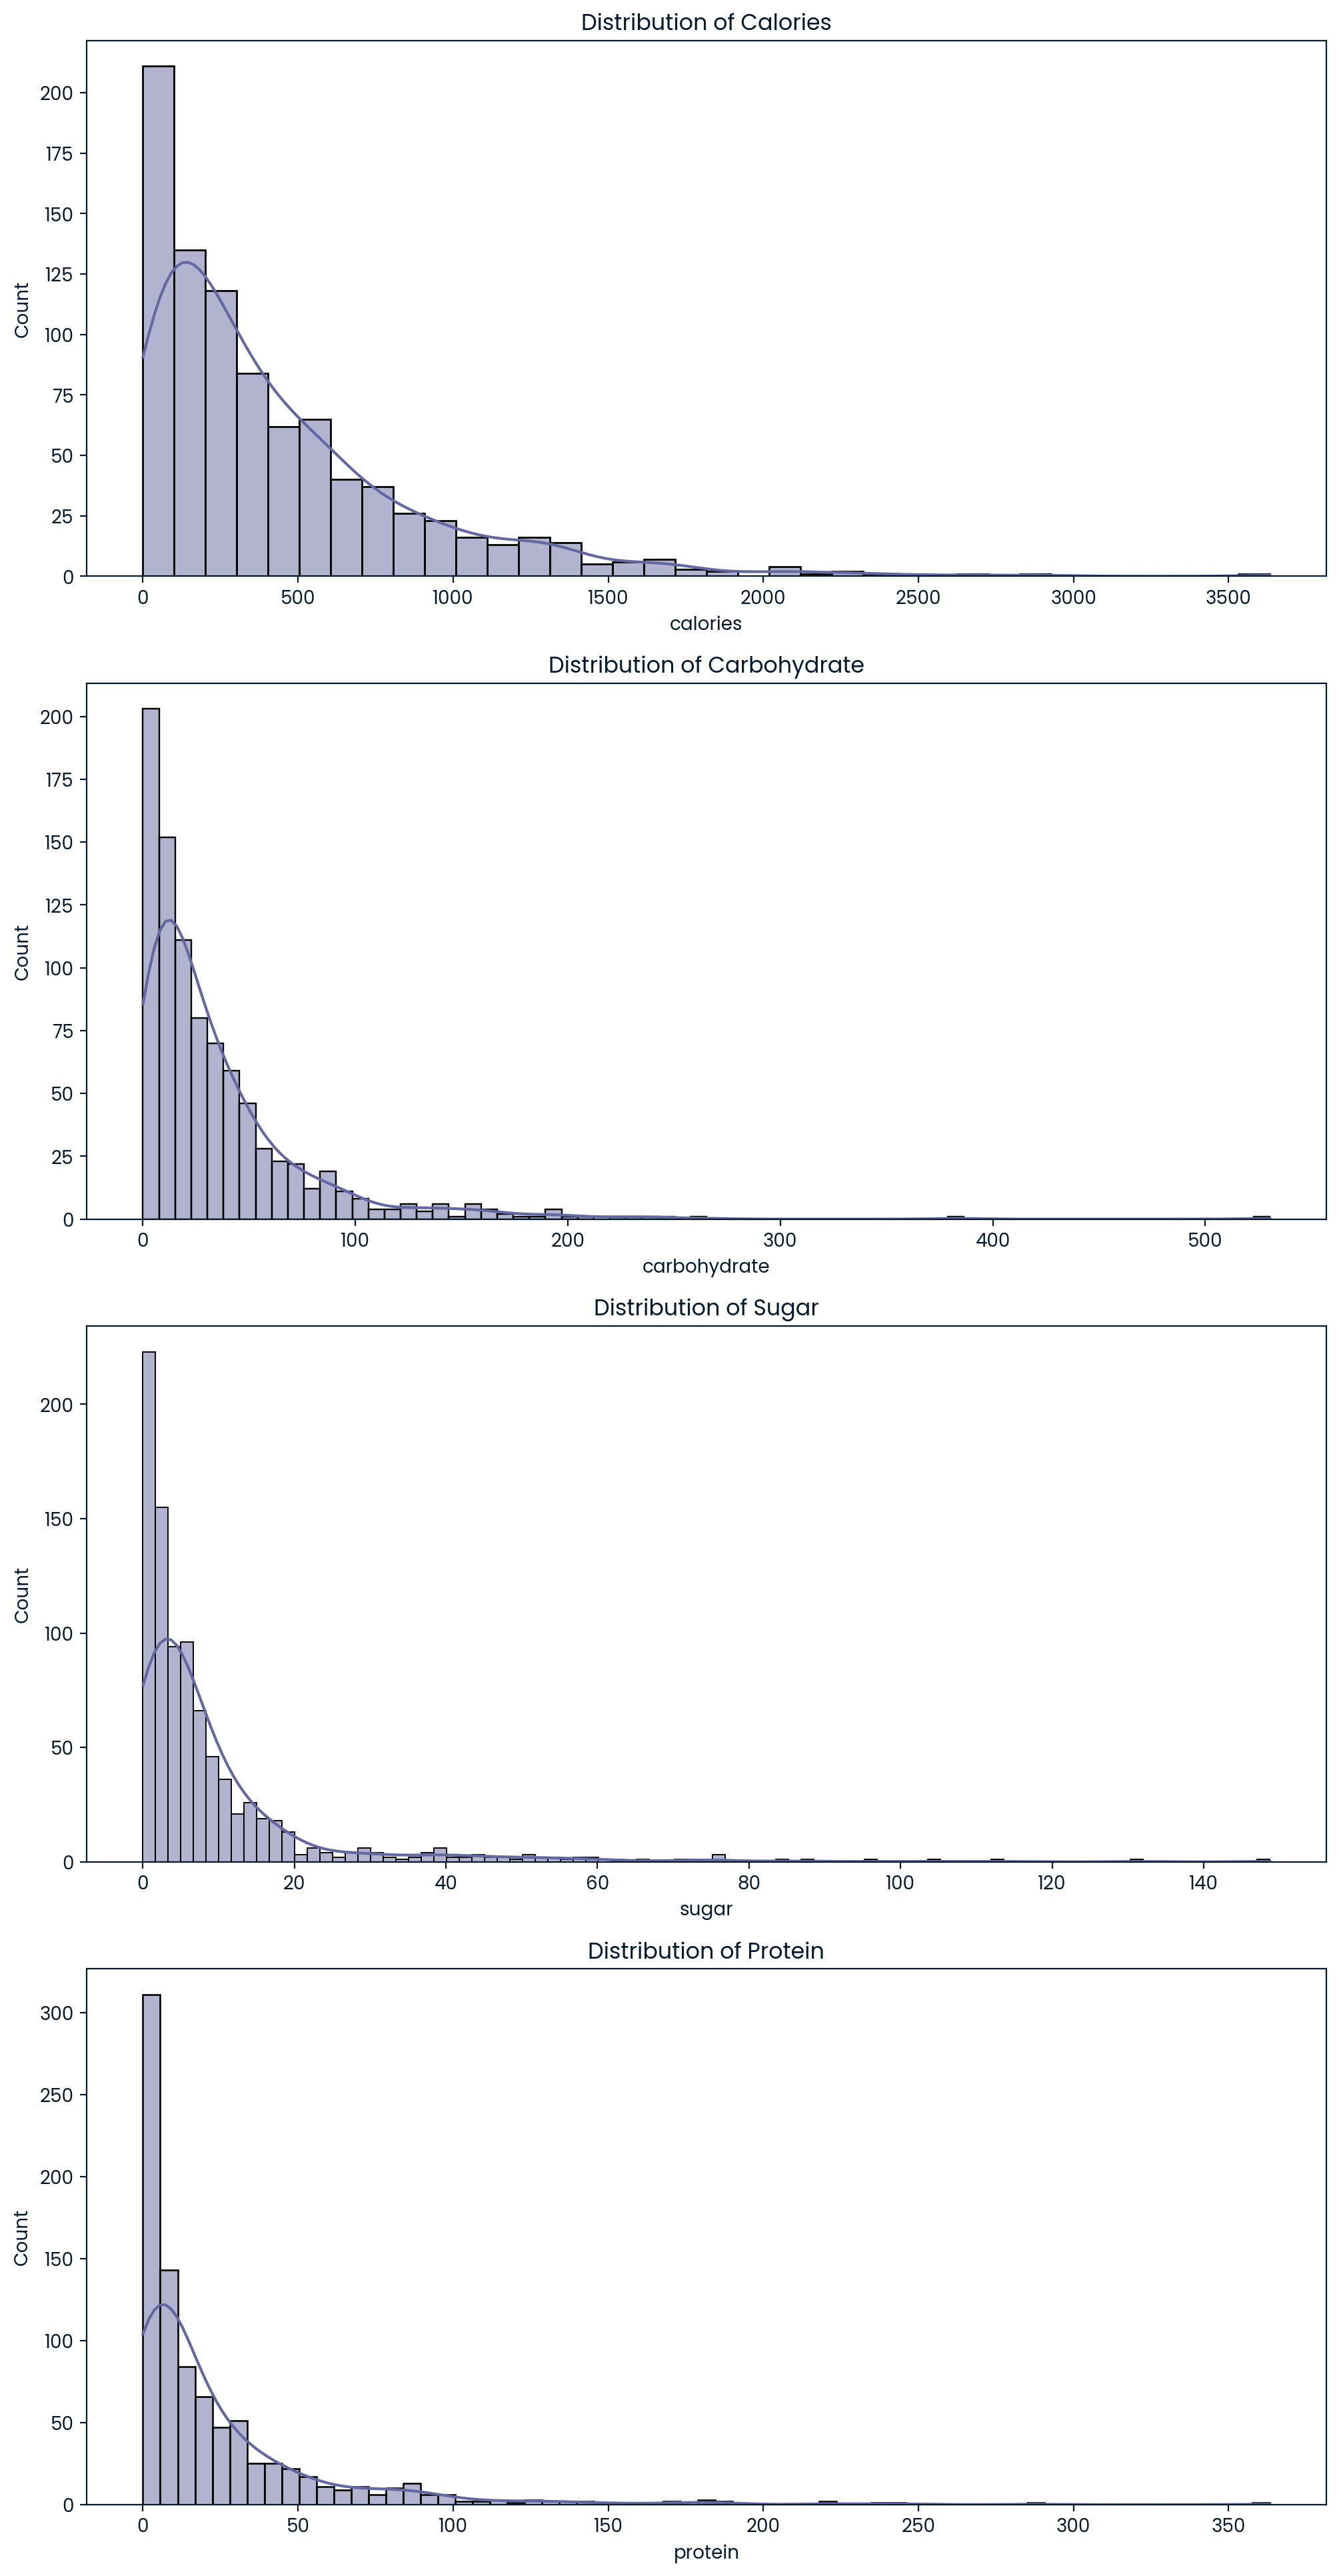

In [41]:
# Generate histograms to visualize the distribution of calories
numerical_columns = data.select_dtypes(include='float').columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=data, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")
plt.tight_layout

### The smooth curves (KDE) in the histograms show the data distribution. Most recipes seem to have lower calorie and nutrient values. The histograms confirm our suspicion of a right skew (data leaning towards lower values) in all numerical columns. Let's use box plots for a different view of the distribution.

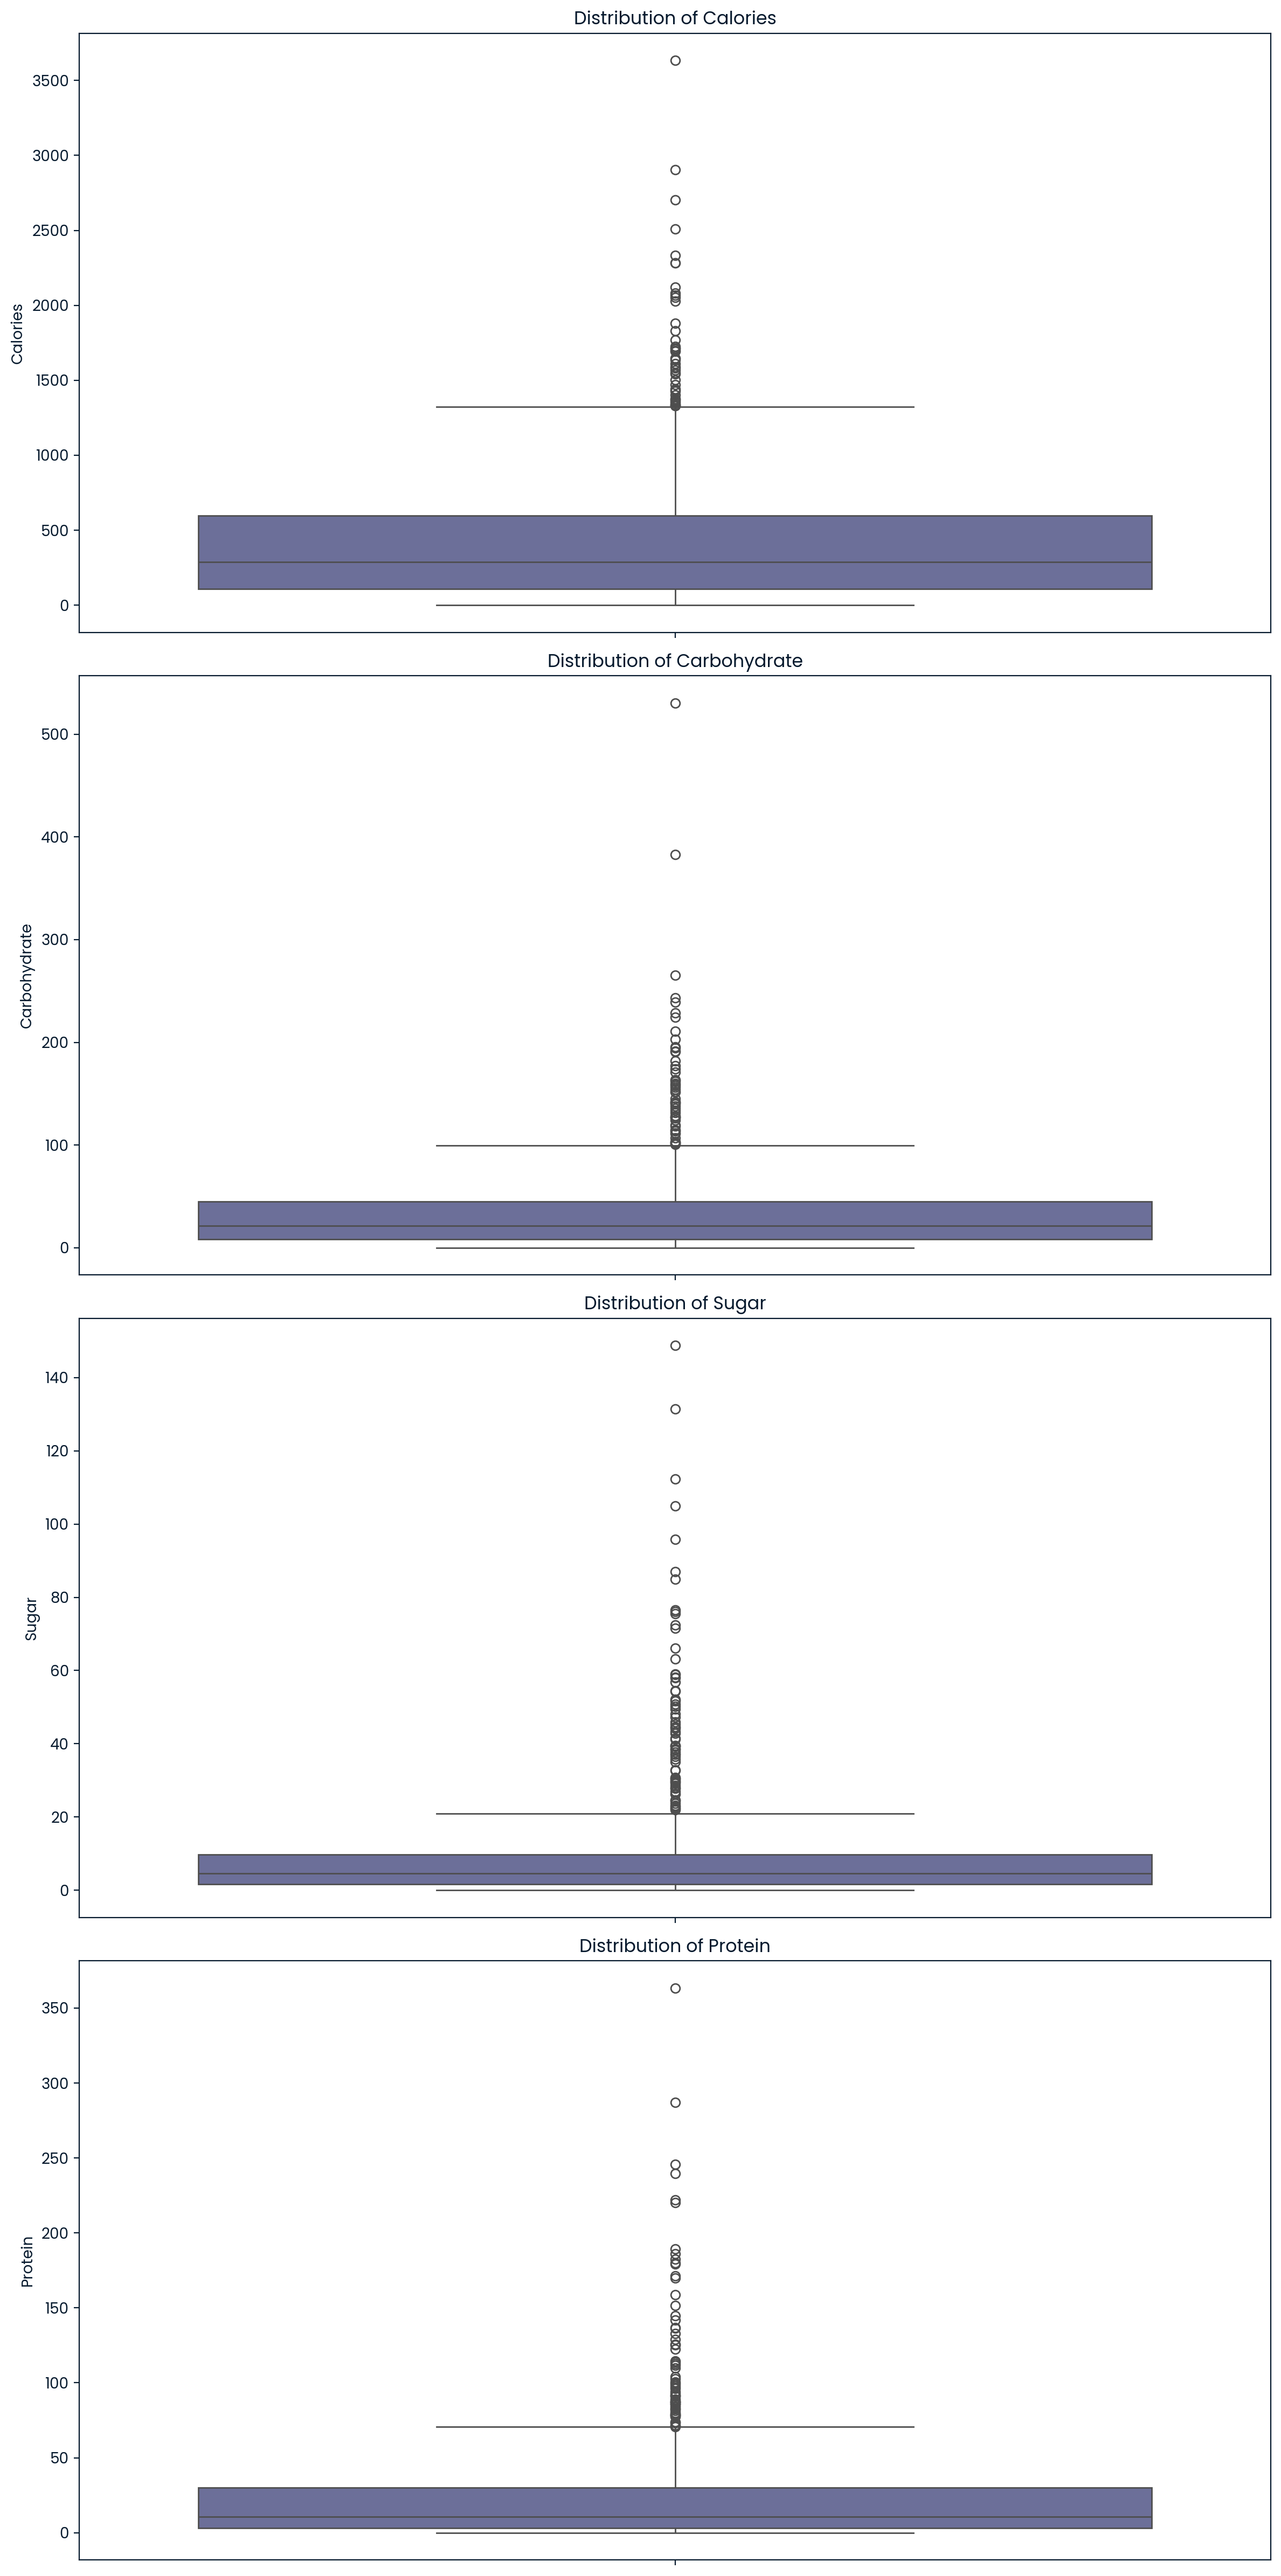

In [42]:
# Select numerical columns using a list comprehension
numerical_columns = [col for col in data.columns if data[col].dtype == float]

# Create subplots with a single column (avoiding unnecessary variable)
fig, axes = plt.subplots(len(numerical_columns), 1, figsize=(12, 6 * len(numerical_columns)))  # Adjust figsize as needed

# Iterate and plot boxplots with cleaner syntax (Corrected)
for i, col in enumerate(numerical_columns):
    sns.boxplot(y=data[col], ax=axes[i])  # Correct way to plot single boxplot
    axes[i].set_title(f"Distribution of {col.capitalize()}")
    axes[i].set_ylabel(col.capitalize())  # Set y-axis label to the column name

# Adjust layout directly on the figure
fig.tight_layout()
plt.show()

### The data for calories, carbohydrates, sugar, and protein is concentrated at lower values with a significant number of high outliers, resulting in a positively skewed distribution for all four nutritional components. This suggests that while most recipes have moderate amounts of these nutrients, there are some recipes with exceptionally high values that contribute to the skewness and the presence of outliers.

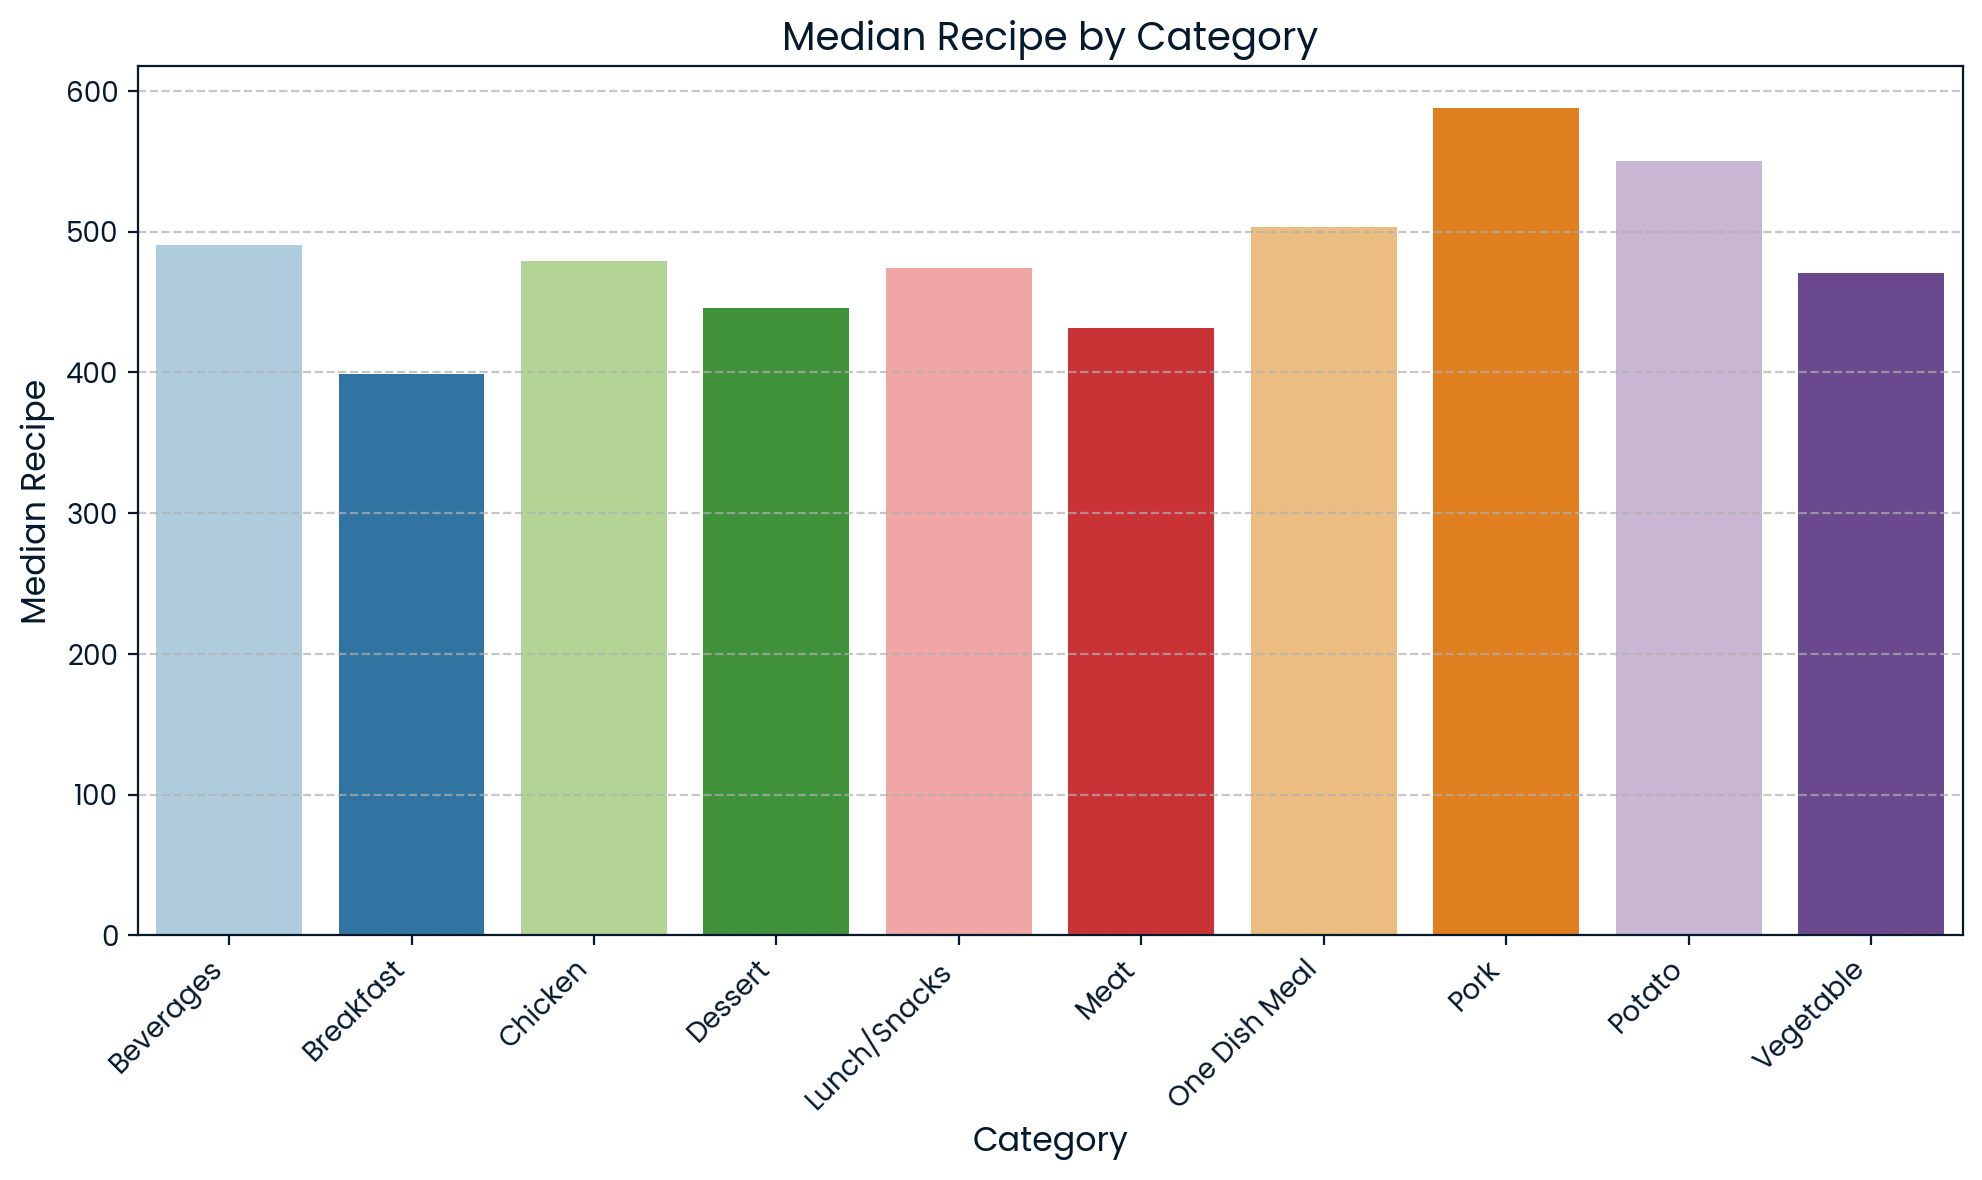

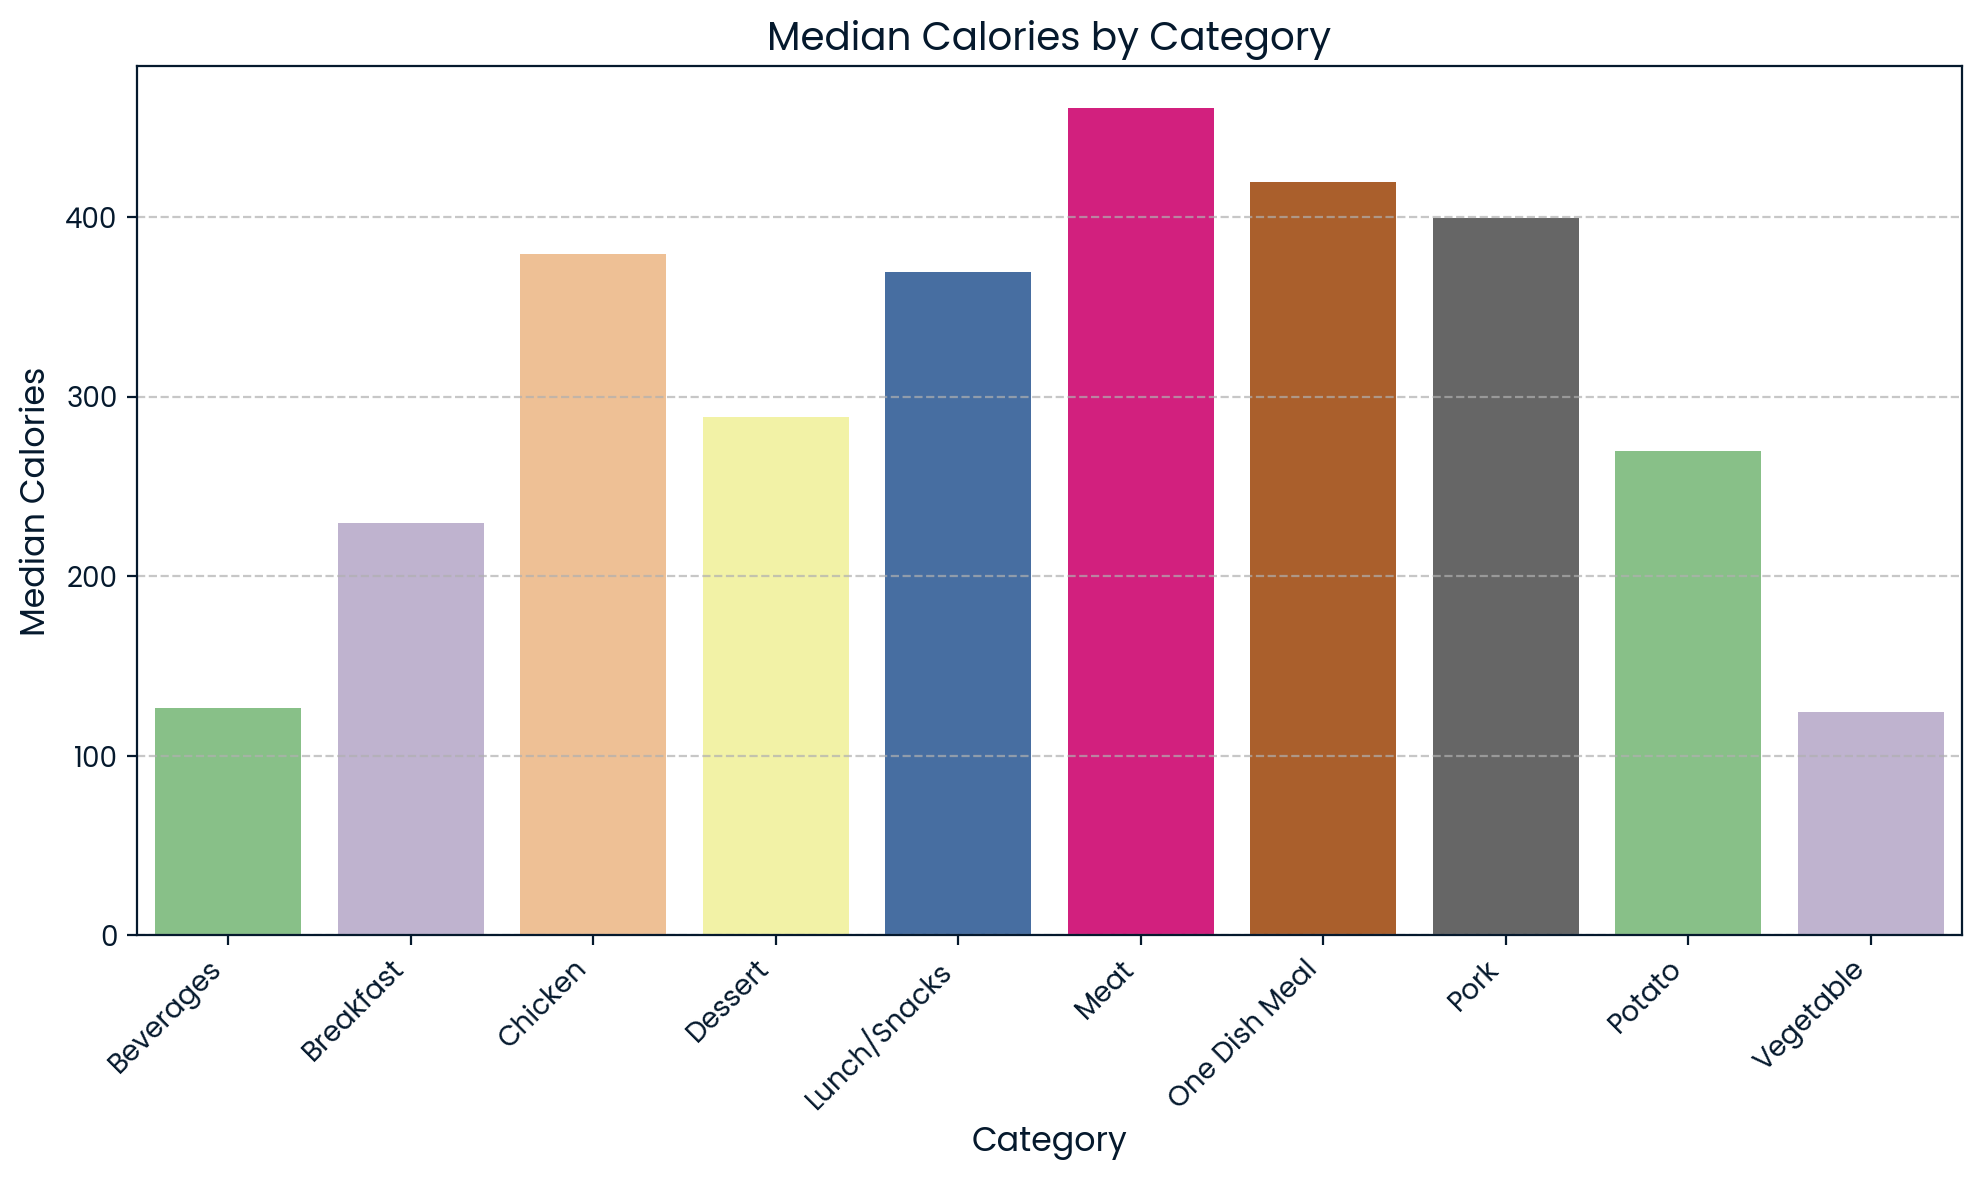

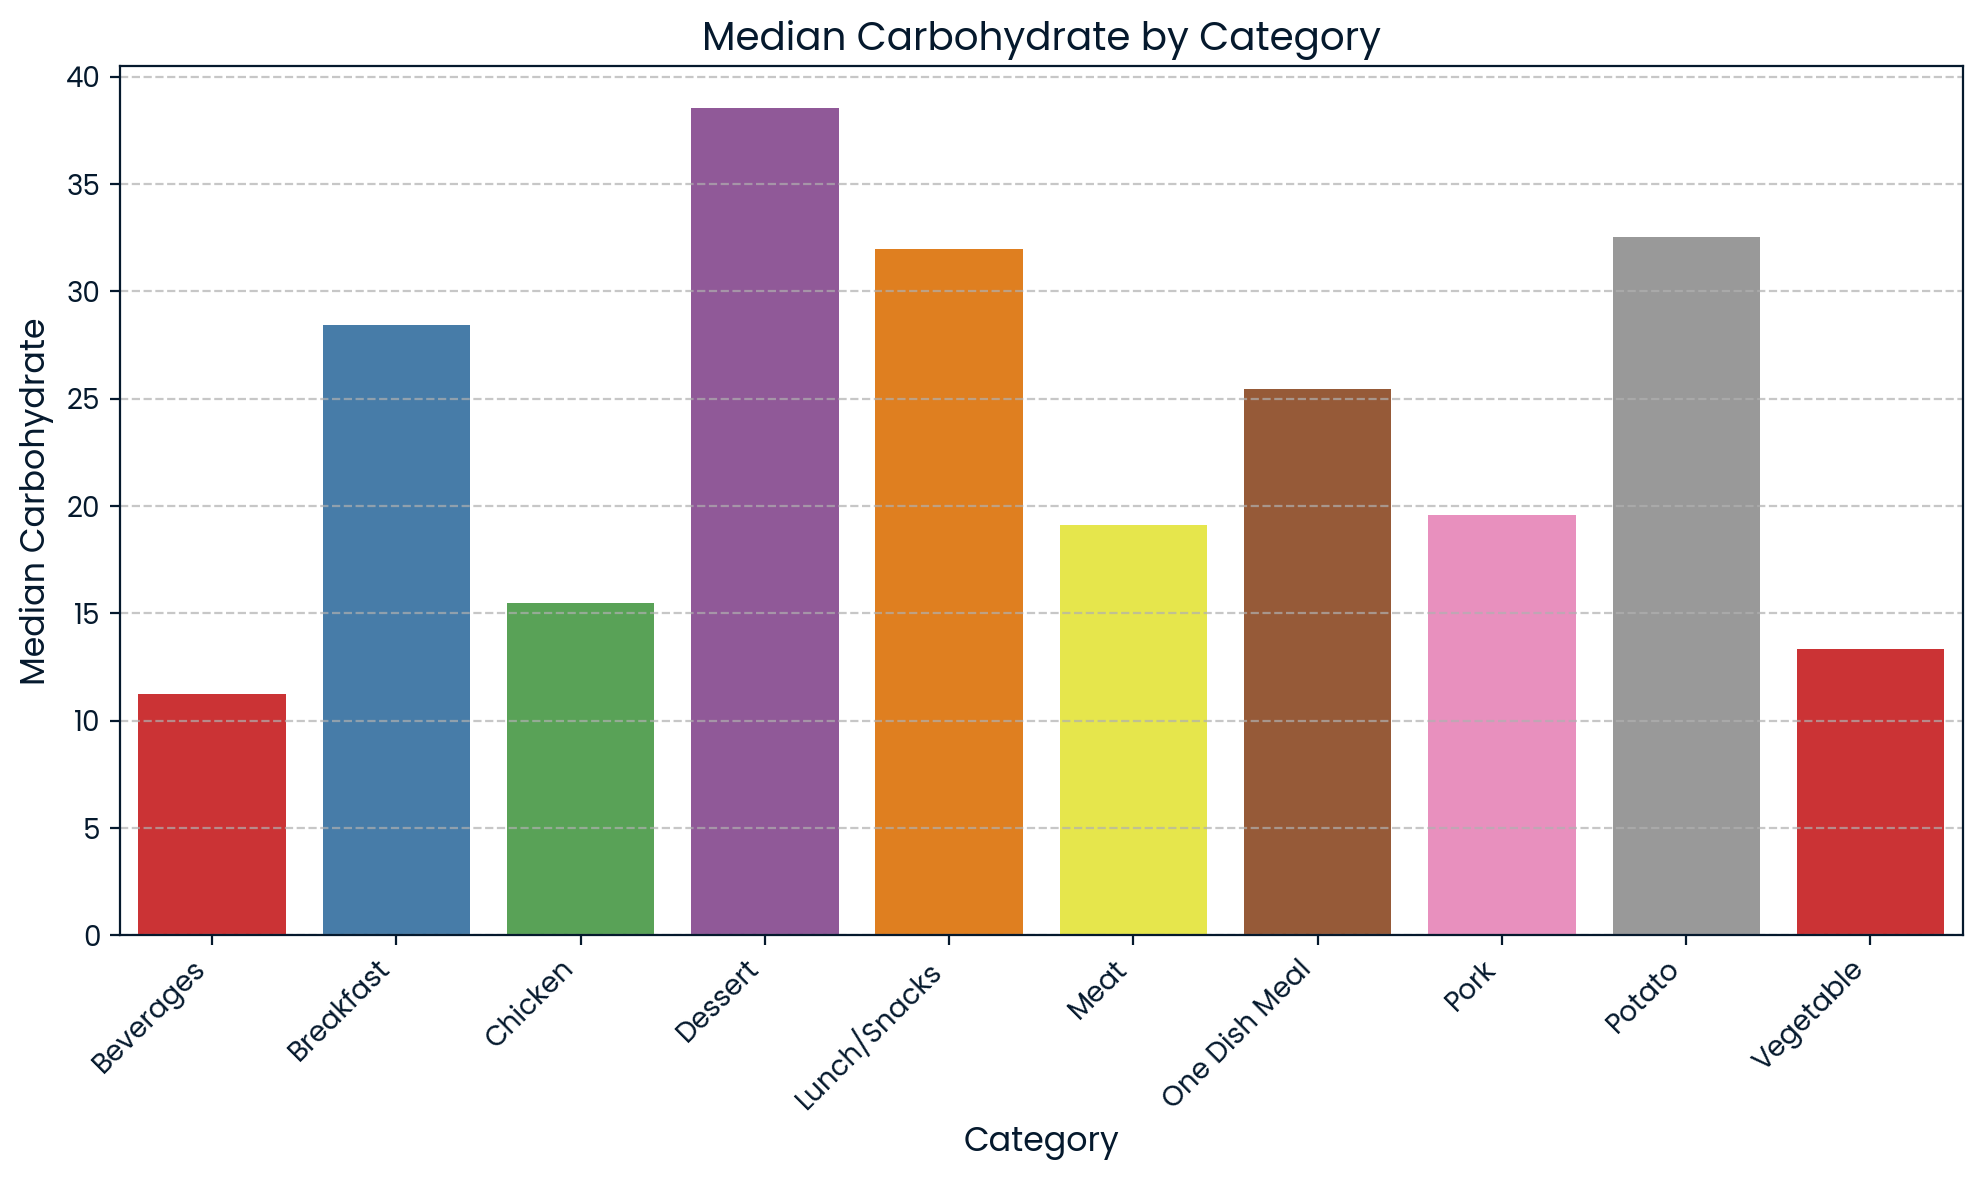

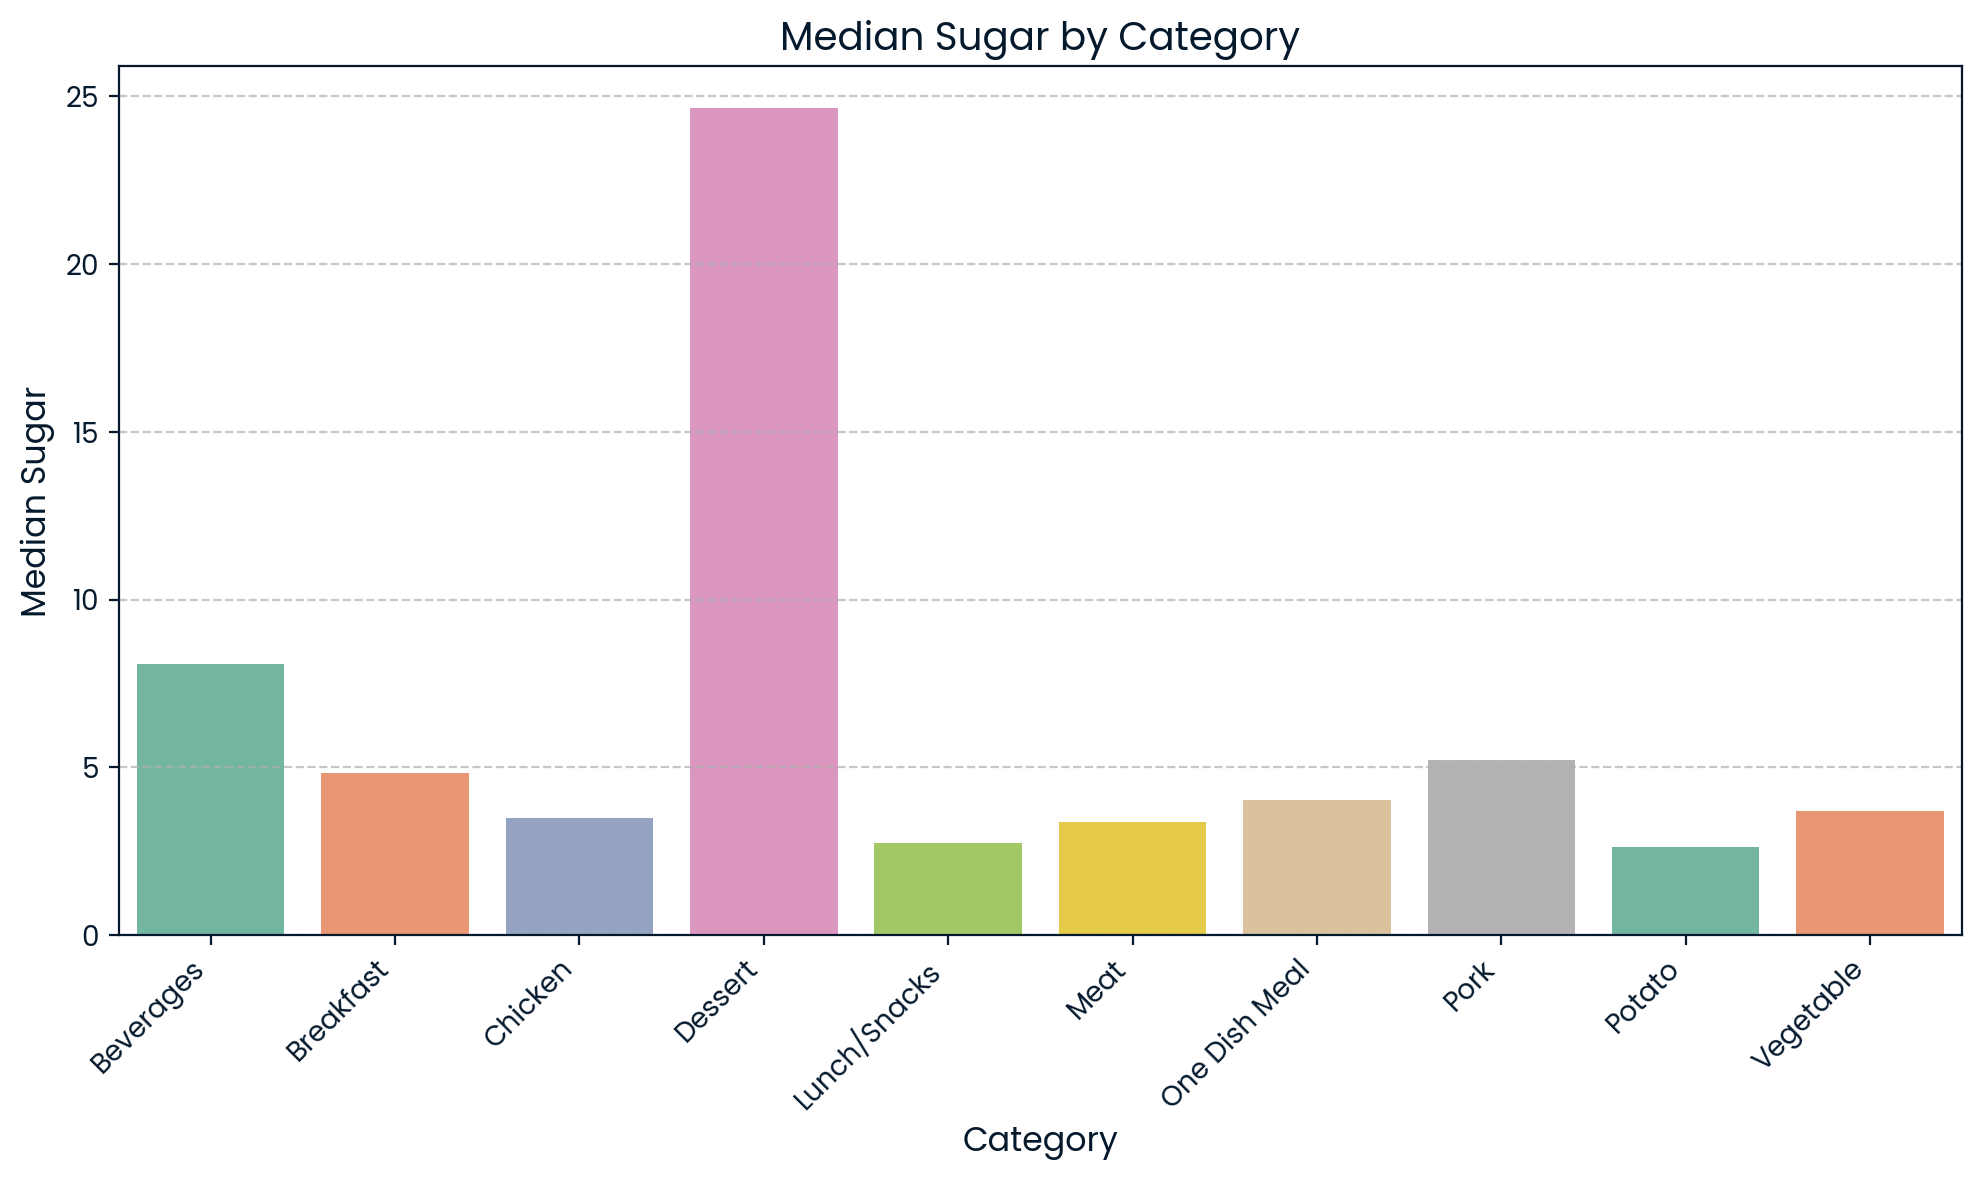

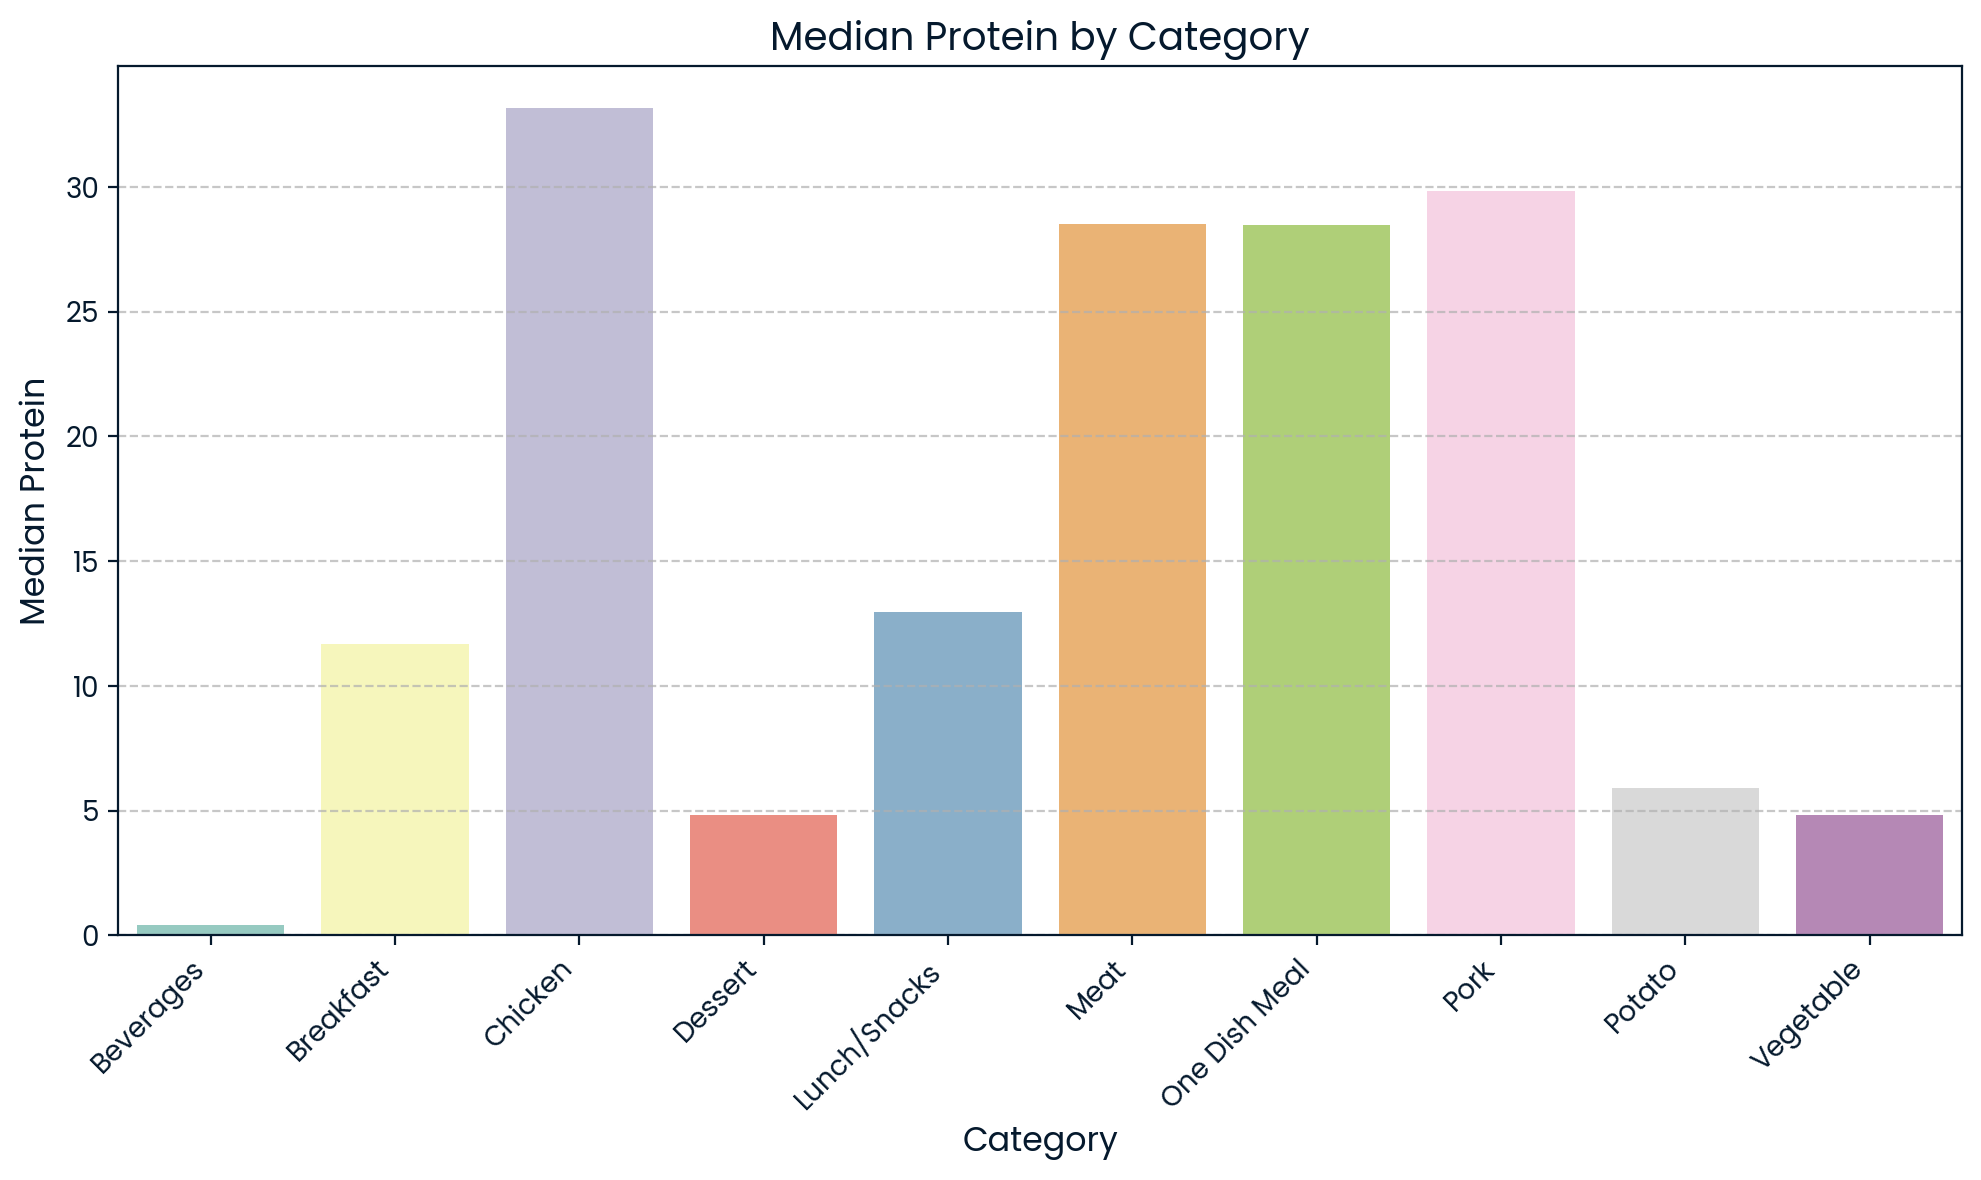

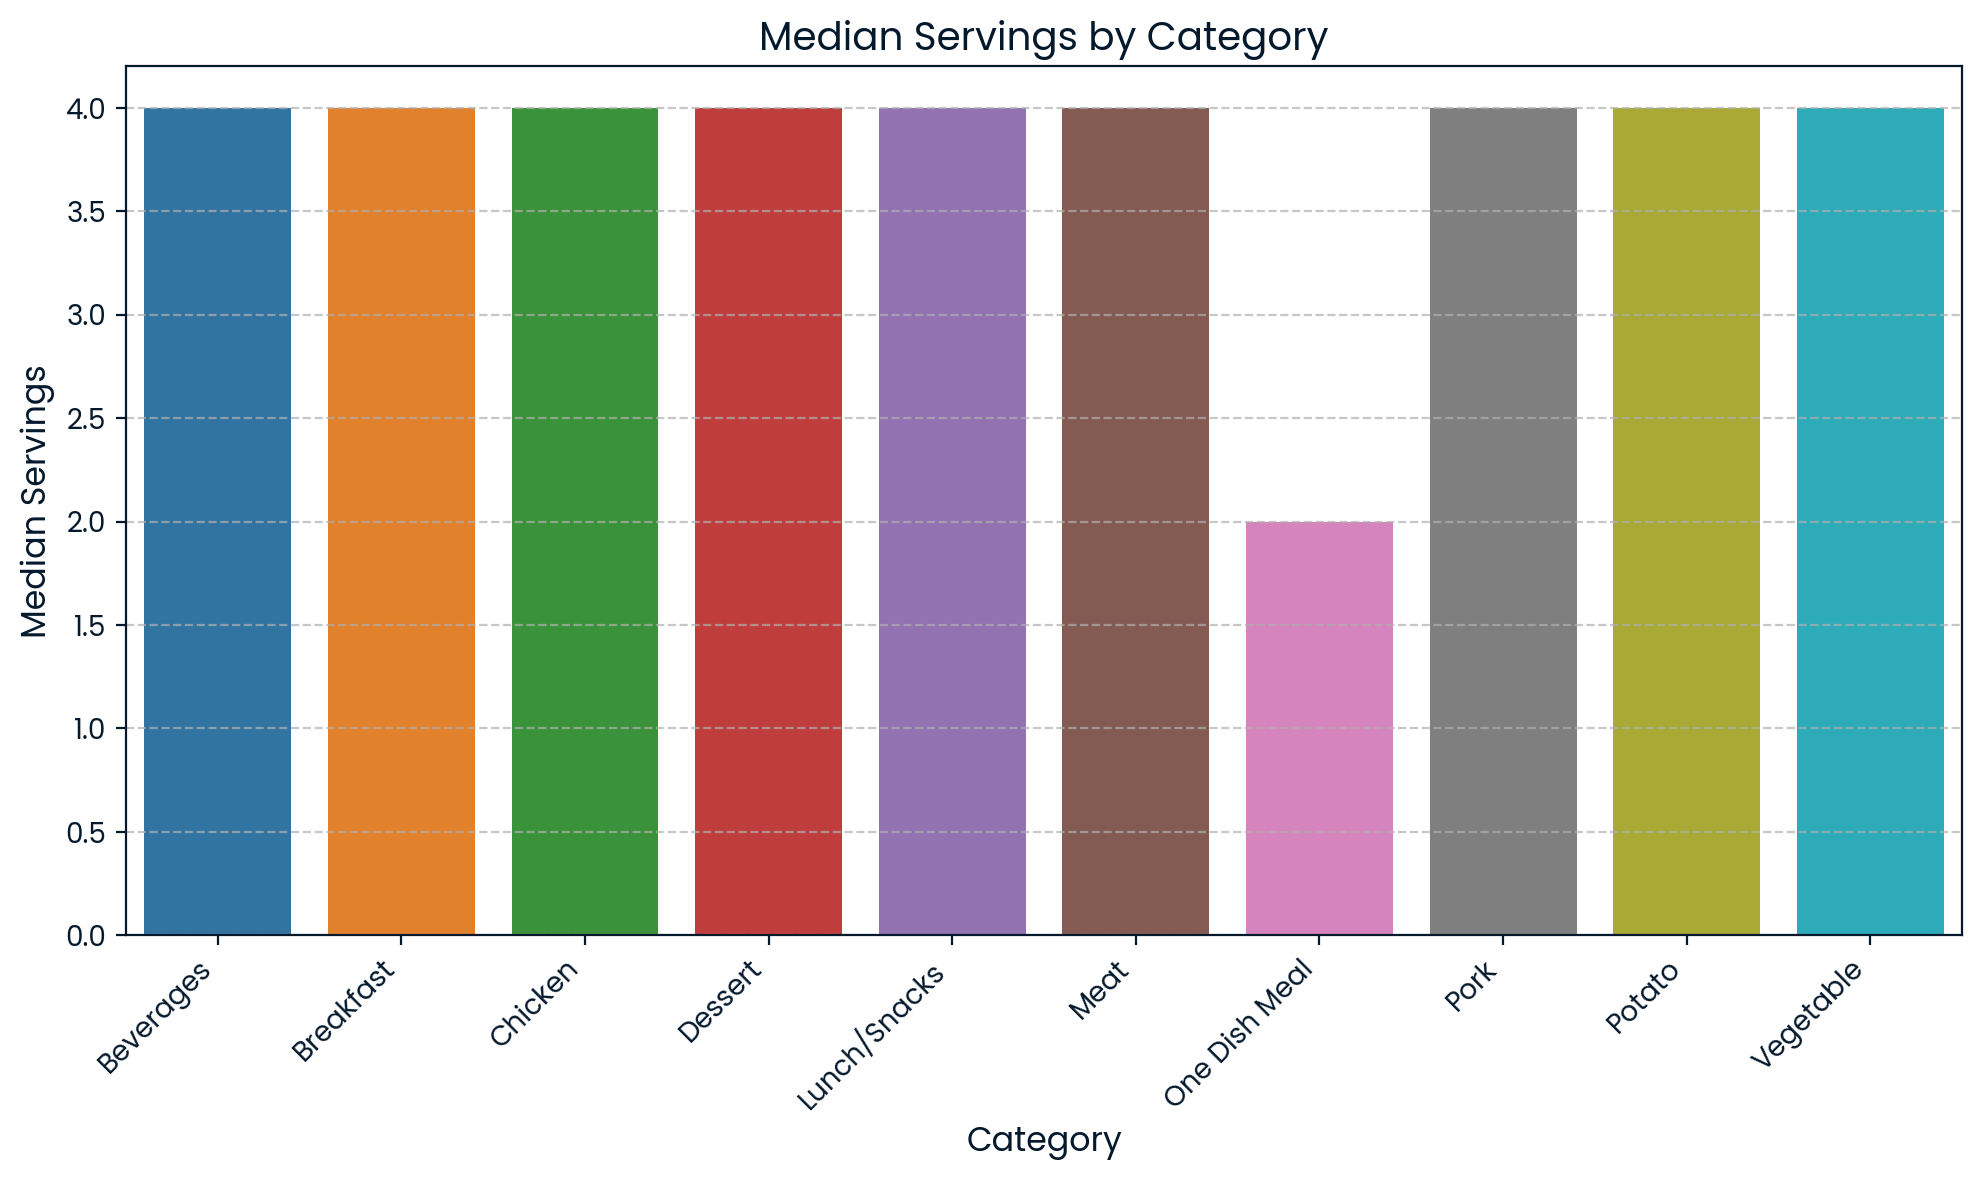

In [43]:
numerical_columns = data.select_dtypes(include=np.number).columns.tolist()

category_medians = data.groupby("category")[numerical_columns].median().reset_index()

# Color palettes
color_palettes = [
    "Paired", "Accent", "Set1", "Set2", "Set3", "tab10", "tab20", "tab20b", "tab20c",
    "Pastel1", "Pastel2", "Dark2", "cubehelix", "rocket", "mako", "flare", "crest"
]

for i, column in enumerate(numerical_columns):
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    
    # Select a color palette (cycle through palettes if there are more plots than palettes)
    palette = color_palettes[i % len(color_palettes)]

    # Create the bar plot with seaborn
    sns.barplot(x="category", y=column, data=category_medians, palette=palette)

    # Set labels and title
    plt.xlabel("Category", fontsize=12)
    plt.ylabel(f"Median {column.capitalize()}", fontsize=12)
    plt.title(f"Median {column.capitalize()} by Category", fontsize=14)

    # Rotate x-axis labels if needed
    plt.xticks(rotation=45, ha='right', fontsize=10) # Improved rotation

    # Add grid for better readability
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()

### The bar charts reveal distinct variations in median nutritional content (calories, carbohydrates, sugar, and protein) across recipe categories. "One Dish Meal," "Meat," and "Pork" exhibit higher median calories and protein. 

### "Breakfast" and "Lunch/Snacks" show higher median carbohydrates. As expected, "Dessert" has the highest median sugar. Conversely, "Beverages" and "Vegetable" categories generally have lower medians for most nutrients.

### These findings are relevant for dietary planning (e.g., choosing lower-calorie recipes from "Vegetable" or higher-protein from "Meat"), recipe development (e.g., creating high-protein breakfasts or low-sugar desserts), and health research (investigating nutritional impacts of dietary patterns). 

### Further analysis could involve statistical tests (like Kruskal-Wallis) for significance and exploring other visualizations like box plots.

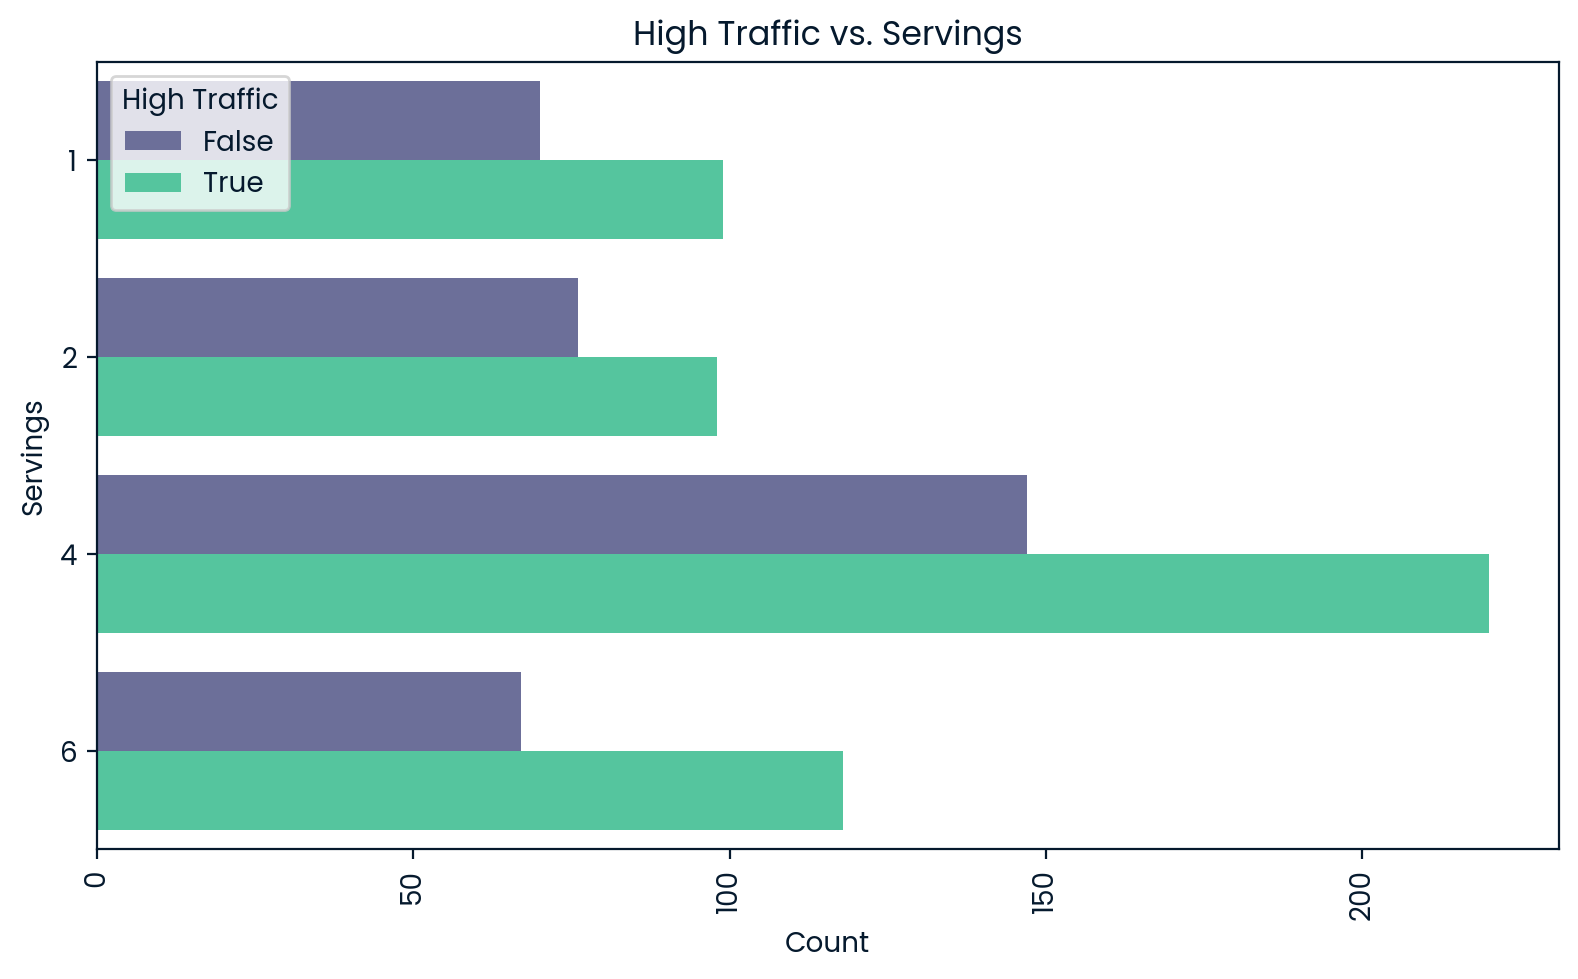

In [44]:
plt.figure(figsize=(8, 5))  # Adjust figure size for readability
sns.countplot(y="servings", hue="high_traffic", data=data)

# Set labels and title concisely
plt.xlabel("Count")
plt.ylabel("Servings")
plt.title("High Traffic vs. Servings")
plt.xticks(rotation=90)  # Optional: Rotate x-axis ticks for readability
plt.legend(title="High Traffic", loc="upper left")  # Improved legend position
plt.tight_layout()
plt.show()

### This count plot explores the relationship between the number of servings in a recipe and whether it receives high traffic. By analyzing the bars, we can see:

### Distribution of Servings: The overall distribution of servings can be observed, with some serving sizes appearing more frequently than others.

### High-Traffic Recipes: The coloring by "high_traffic" indicates whether high-traffic recipes tend to have a specific serving size range. Are there more or fewer high-traffic recipes in certain serving size categories?

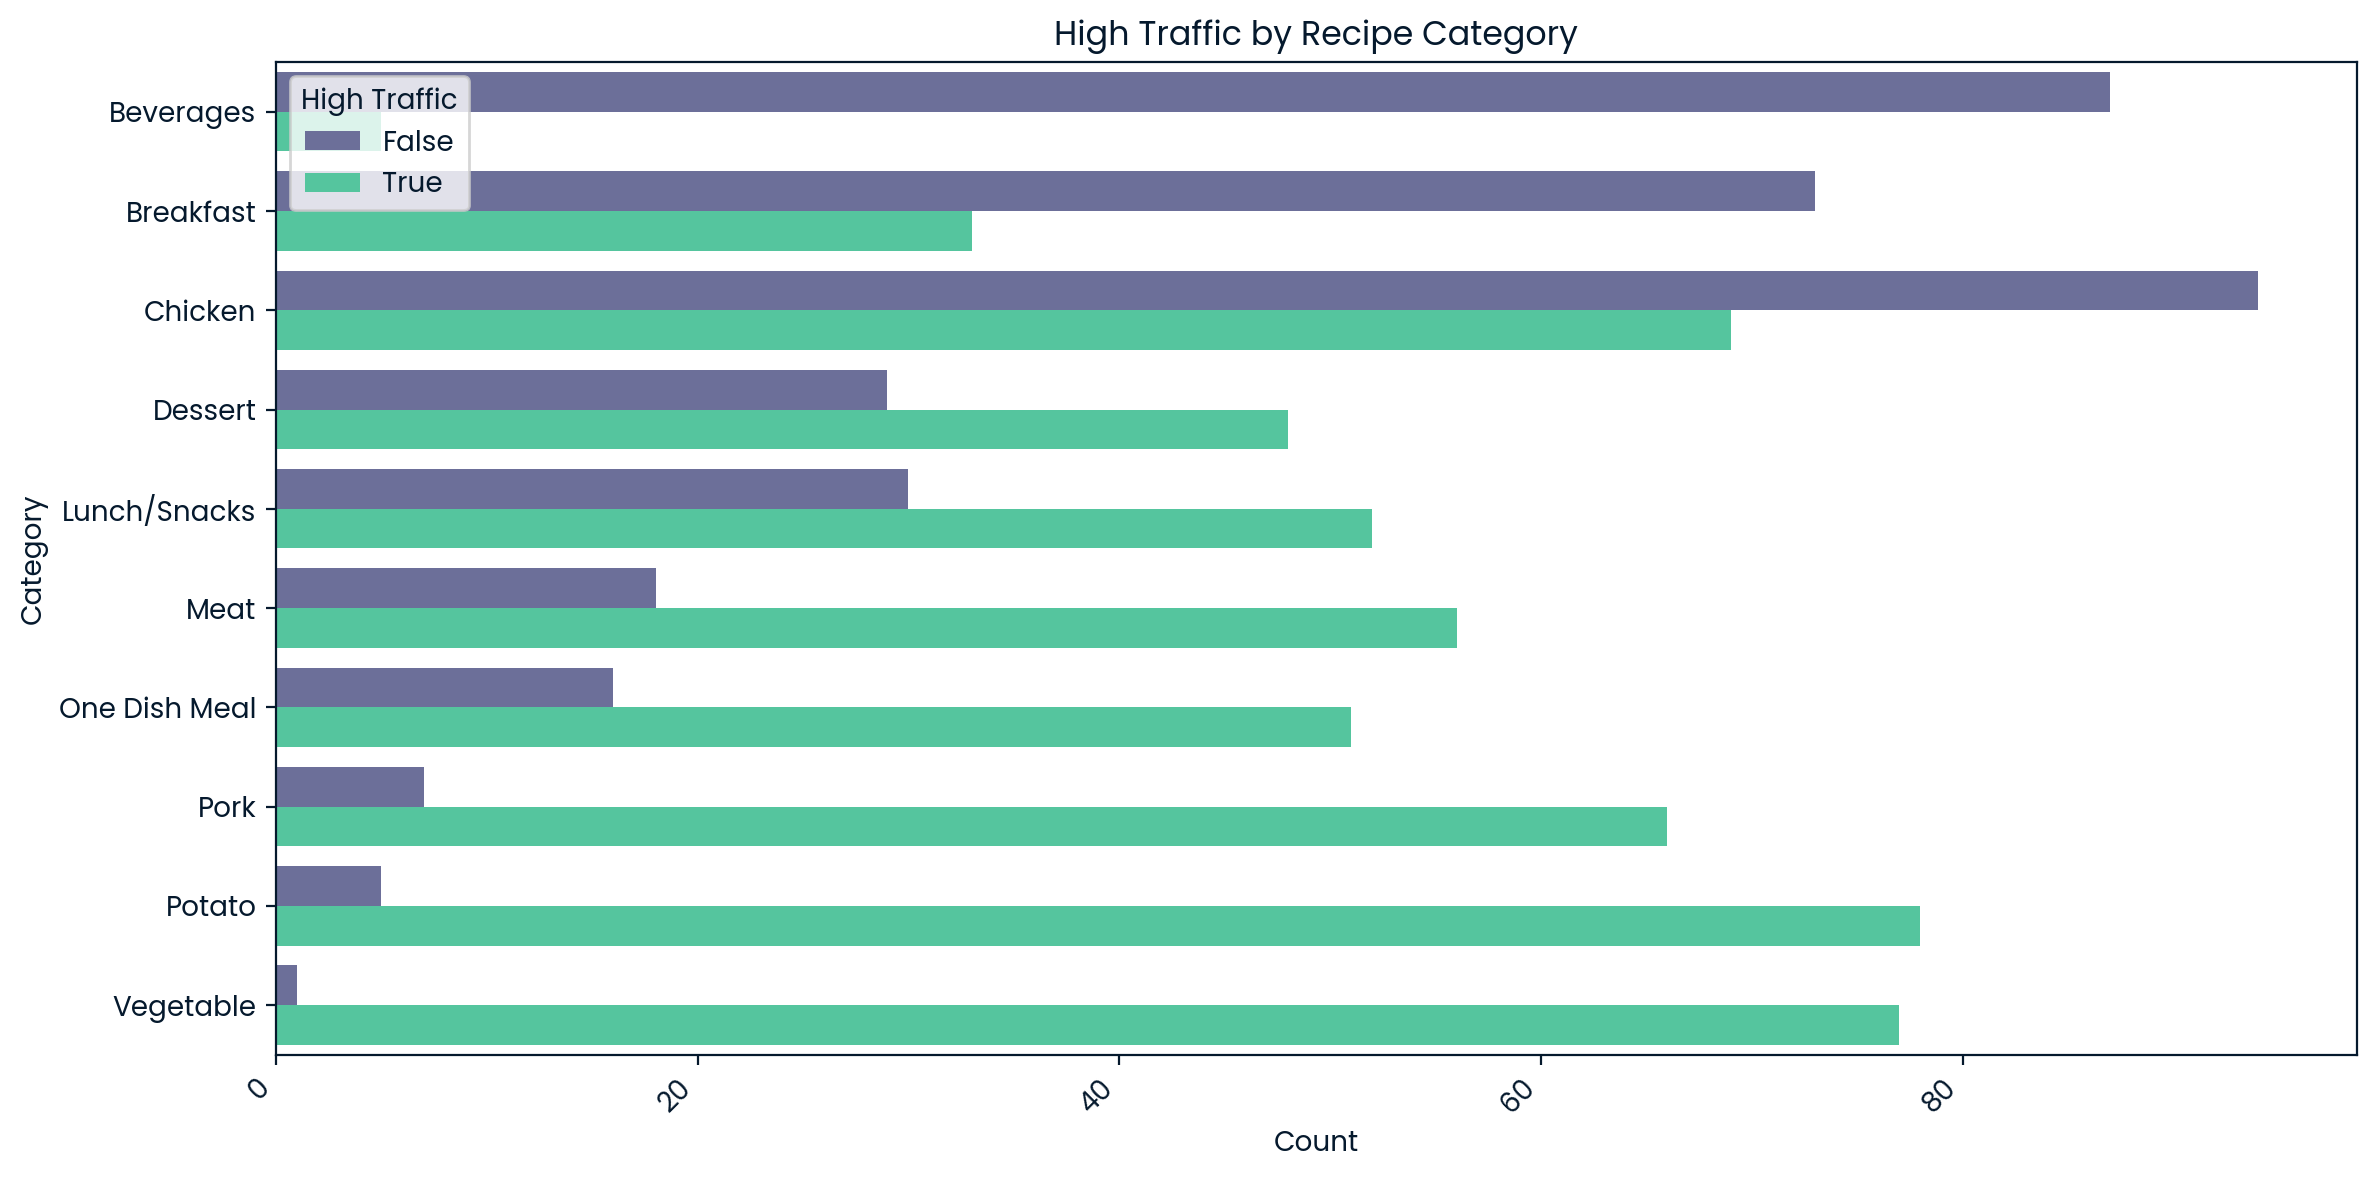

In [45]:
plt.figure(figsize=(12, 6))  # Adjust as needed for readability
sns.countplot(y="category", hue="high_traffic", data=data)

# Set labels and title concisely
plt.xlabel("Count")
plt.ylabel("Category")
plt.title("High Traffic by Recipe Category")
plt.xticks(rotation=45, ha='right')  # Improved rotation for readability
plt.legend(title="High Traffic", loc="upper left")  # Improved legend position
plt.tight_layout()
plt.show()

### This count plot explores how the distribution of high-traffic recipes varies across different recipe categories. By analyzing the bars, we can understand:

### Popular Categories: Which recipe categories have the highest number of high-traffic recipes? Are there any categories with surprisingly low or high traffic?

### Traffic Distribution: Does high traffic seem evenly distributed across all categories, or are there some categories attracting more high-traffic recipes?

In [46]:
# Create pivot table for aggregation (using count of recipes instead of sum of servings)
high_traffic_category = data.pivot_table(index="category", columns="high_traffic", values="recipe", aggfunc="count")

# Normalize the table to show proportions within each category
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

# Show the result with improved formatting
print(normalized_table.to_string()) # to_string() for better console output

high_traffic      False     True 
category                         
Beverages      0.945652  0.054348
Breakfast      0.688679  0.311321
Chicken        0.576687  0.423313
Dessert        0.376623  0.623377
Lunch/Snacks   0.365854  0.634146
Meat           0.243243  0.756757
One Dish Meal  0.238806  0.761194
Pork           0.095890  0.904110
Potato         0.060241  0.939759
Vegetable      0.012821  0.987179


### Certain categories drive more traffic; "Vegetable," "Potato," and "Pork" are the top performers, while "Beverages" has the lowest impact.

### To predict high traffic, we'll use binary classification models (e.g., Logistic Regression, Decision Tree, Random Forest, SVM). We'll start with Logistic Regression as our baseline and address outliers using the Interquartile Range (IQR) method to define upper and lower bounds.

In [47]:
def calculate_outlier_limits(data, factor=1.5):
    """Calculates upper and lower outlier boundaries using the IQR method."""
    q1, q3 = np.percentile(data, [25, 75])  # Calculate both percentiles at once
    iqr = q3 - q1
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit

numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

# Calculate and store outlier limits in a dictionary using a dictionary comprehension
outlier_limits = {
    column: calculate_outlier_limits(data[column])
    for column in numerical_columns
}

# Print outlier limits with cleaner formatting
for column, (lower, upper) in outlier_limits.items(): # Direct unpacking in the loop
    print(f"Outlier limits for {column}: Lower = {lower:.2f}, Upper = {upper:.2f}") # Format to 2 decimal places

Outlier limits for calories: Lower = -620.40, Upper = 1328.48
Outlier limits for carbohydrate: Lower = -46.51, Upper = 99.85
Outlier limits for sugar: Lower = -10.48, Upper = 21.97
Outlier limits for protein: Lower = -37.31, Upper = 70.71


### The calculated outlier limits, based on the Interquartile Range (IQR) method with a factor of 1.5, provide thresholds for identifying potential outliers in the nutritional data.

- Calories: Values below -620.40 or above 1328.48 are flagged as potential calorie outliers. Since calorie values cannot be negative, the lower limit is effectively 0. Any values above 1328.48 represent unusually high-calorie recipes.
- Carbohydrate: Values below -46.51 or above 99.85 are flagged as potential carbohydrate outliers. Again, the lower limit is effectively 0. Values exceeding 99.85 represent recipes with exceptionally high carbohydrate content.
- Sugar: Values below -10.48 or above 21.97 are flagged as potential sugar outliers. With the lower limit effectively being 0, values above 21.97 indicate recipes with particularly high sugar content.
- Protein: Values below -37.31 or above 70.71 are flagged as potential protein outliers. The lower limit is effectively 0. Values above 70.71 represent recipes with unusually high protein content.

In [48]:
# Using the previous calculated outlier_limits to remove oultliers:
from scipy.stats import yeojohnson
import pandas as pd

numerical_columns = data.select_dtypes(include='float').columns

transformed_data = data.copy()

for column, (lower_limit, upper_limit) in outlier_limits.items(): # Direct unpacking
    # Yeo-Johnson Transformation (preferred method based on previous analysis)
    transformed_data[column] = yeojohnson(transformed_data[column])[0]

print(transformed_data.head())

   recipe   calories  carbohydrate  ...       category  servings high_traffic
0       2   5.742713      4.409023  ...         Potato         4         True
1       3  17.437755      4.550612  ...      Breakfast         1        False
2       4   8.416476      4.091120  ...      Beverages         4         True
3       5   5.133412      1.101661  ...      Beverages         4        False
4       6  16.024490      1.607528  ...  One Dish Meal         2         True

[5 rows x 8 columns]


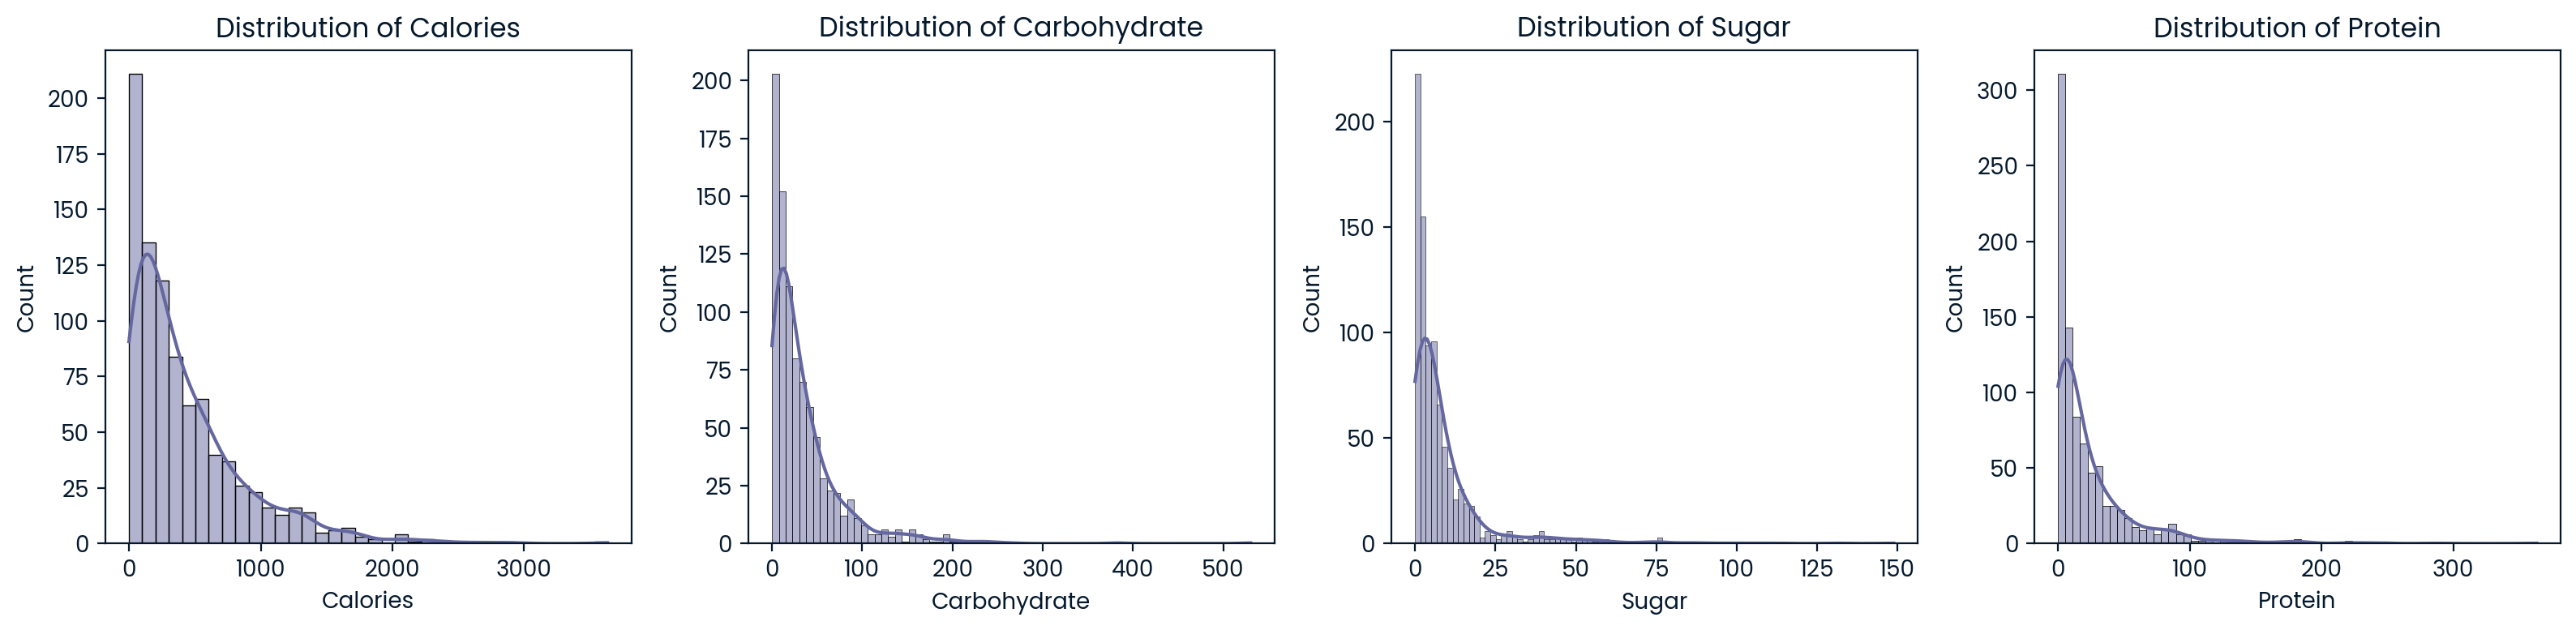

In [49]:
# Visualizing the distributions of the transformed numerical columns using Seaborn's histplot function:
# Create subplots
num_cols = len(numerical_columns)
fig, axes = plt.subplots(1, num_cols, figsize=(16, 4)) # 1 row, multiple columns

# Iterate and plot histograms (Corrected titles)
for i, col in enumerate(numerical_columns):
    sns.histplot(data=data[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col.capitalize()}") # Correct title
    axes[i].set_xlabel(col.capitalize()) # Add x-axis label
    axes[i].set_ylabel("Count") # Add y-axis label

plt.tight_layout()
plt.show()

### The histograms show the distributions of Calories, Carbohydrate, Sugar, and Protein. All four distributions are strongly right-skewed (positive skew), meaning most values are concentrated at the lower end of the range, with fewer, much larger values extending the distribution to the right. This indicates that most recipes have relatively low amounts of these nutrients, while a smaller number of recipes contain significantly higher amounts.

In [50]:
# Perform one-hot encoding on the category column
encoded_categories = pd.get_dummies(data["category"], prefix="category") # Add prefix

# Concatenate the encoded categories with the transformed data
data_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

# Drop the original category column (if it exists in transformed_data)
if "category" in data.columns: # Check if column exists before dropping
    data_encoded = data_encoded.drop("category", axis=1)

data_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,category_Beverages,category_Breakfast,category_Chicken,category_Dessert,category_Lunch/Snacks,category_Meat,category_One Dish Meal,category_Pork,category_Potato,category_Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,True,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,False,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,True,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,False,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,True,0,0,0,0,0,0,1,0,0,0


In [51]:
# Step 3: Model Development
# --------------------------
# Split data into features (X) and target variable (y)
features = data_encoded.drop("high_traffic", axis=1)
target = data_encoded["high_traffic"]

# Split data into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)  # Use a different random state

def develop_model(model, X_train, y_train, X_test, y_test):
  """
  Fits a model, makes predictions, and returns evaluation metrics.

  Args:
      model: The machine learning model to be used.
      X_train: Training features.
      y_train: Training target variable.
      X_test: Testing features.
      y_test: Testing target variable.

  Returns:
      A dictionary containing evaluation metrics for both training and testing sets.
  """
  evaluation_metrics = {}

  # Fit the model
  model.fit(X_train, y_train)

  # Make predictions
  y_pred_train = model.predict(X_train)
  y_pred_test = model.predict(X_test)

  # Calculate evaluation metrics
  evaluation_metrics['train'] = {
      'accuracy': accuracy_score(y_train, y_pred_train),
      'precision': precision_score(y_train, y_pred_train),
      'recall': recall_score(y_train, y_pred_train),
      'f1': f1_score(y_train, y_pred_train),
      'confusion_matrix': confusion_matrix(y_train, y_pred_train)
  }

  evaluation_metrics['test'] = {
      'accuracy': accuracy_score(y_test, y_pred_test),
      'precision': precision_score(y_test, y_pred_test),
      'recall': recall_score(y_test, y_pred_test),
      'f1': f1_score(y_test, y_pred_test),
      'confusion_matrix': confusion_matrix(y_test, y_pred_test)
  }

  return evaluation_metrics

In [52]:
def print_metrics(metrics):
    """Prints evaluation metrics in a formatted way."""
    print("  Accuracy:", metrics['accuracy'])
    print("  Precision:", metrics['precision'])
    print("  Recall:", metrics['recall'])
    print("  F1-Score:", metrics['f1'])
    print("  Confusion Matrix:\n", metrics['confusion_matrix'])

# Models and Evaluation
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}

In [53]:
# Step 4: Model Evaluation
# --------------------------
for model_name, model in models.items():
    print(f"\n{model_name}:")
    evaluation = develop_model(model, X_train, y_train, X_test, y_test)
    print("  Train Metrics:")
    print_metrics(evaluation['train'])
    print("  Test Metrics:")
    print_metrics(evaluation['test'])


Logistic Regression:
  Train Metrics:
  Accuracy: 0.7541899441340782
  Precision: 0.7720430107526882
  Recall: 0.8368298368298368
  F1-Score: 0.8031319910514543
  Confusion Matrix:
 [[181 106]
 [ 70 359]]
  Test Metrics:
  Accuracy: 0.7486033519553073
  Precision: 0.7520661157024794
  Recall: 0.8584905660377359
  F1-Score: 0.801762114537445
  Confusion Matrix:
 [[43 30]
 [15 91]]

Decision Tree:
  Train Metrics:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
 [[287   0]
 [  0 429]]
  Test Metrics:
  Accuracy: 0.6368715083798883
  Precision: 0.6952380952380952
  Recall: 0.6886792452830188
  F1-Score: 0.6919431279620852
  Confusion Matrix:
 [[41 32]
 [33 73]]

Random Forest:
  Train Metrics:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
 [[287   0]
 [  0 429]]
  Test Metrics:
  Accuracy: 0.7206703910614525
  Precision: 0.7456140350877193
  Recall: 0.8018867924528302
  F1-Score: 0.7727272727272728
  Confusion Matrix

*   **Logistic Regression:** Shows consistent performance between training and test sets (accuracy around 75-76%, F1-score around 80%). This indicates good generalization and no significant overfitting.
*   **Decision Tree:** Exhibits severe overfitting (100% accuracy on training, ~64% on test). This means the model has memorized the training data and performs poorly on unseen data.
*   **Random Forest:** Also shows overfitting, though slightly less severe than the Decision Tree (100% training accuracy, ~73% test accuracy).
*   **SVM:** The SVM model consistently predicts all instances as the positive class (all `True` for high traffic). This results in perfect recall (1.0) but low precision and moderate F1-score. This behavior suggests a potential issue with the model's configuration or the data not being suitable for a linear SVM.

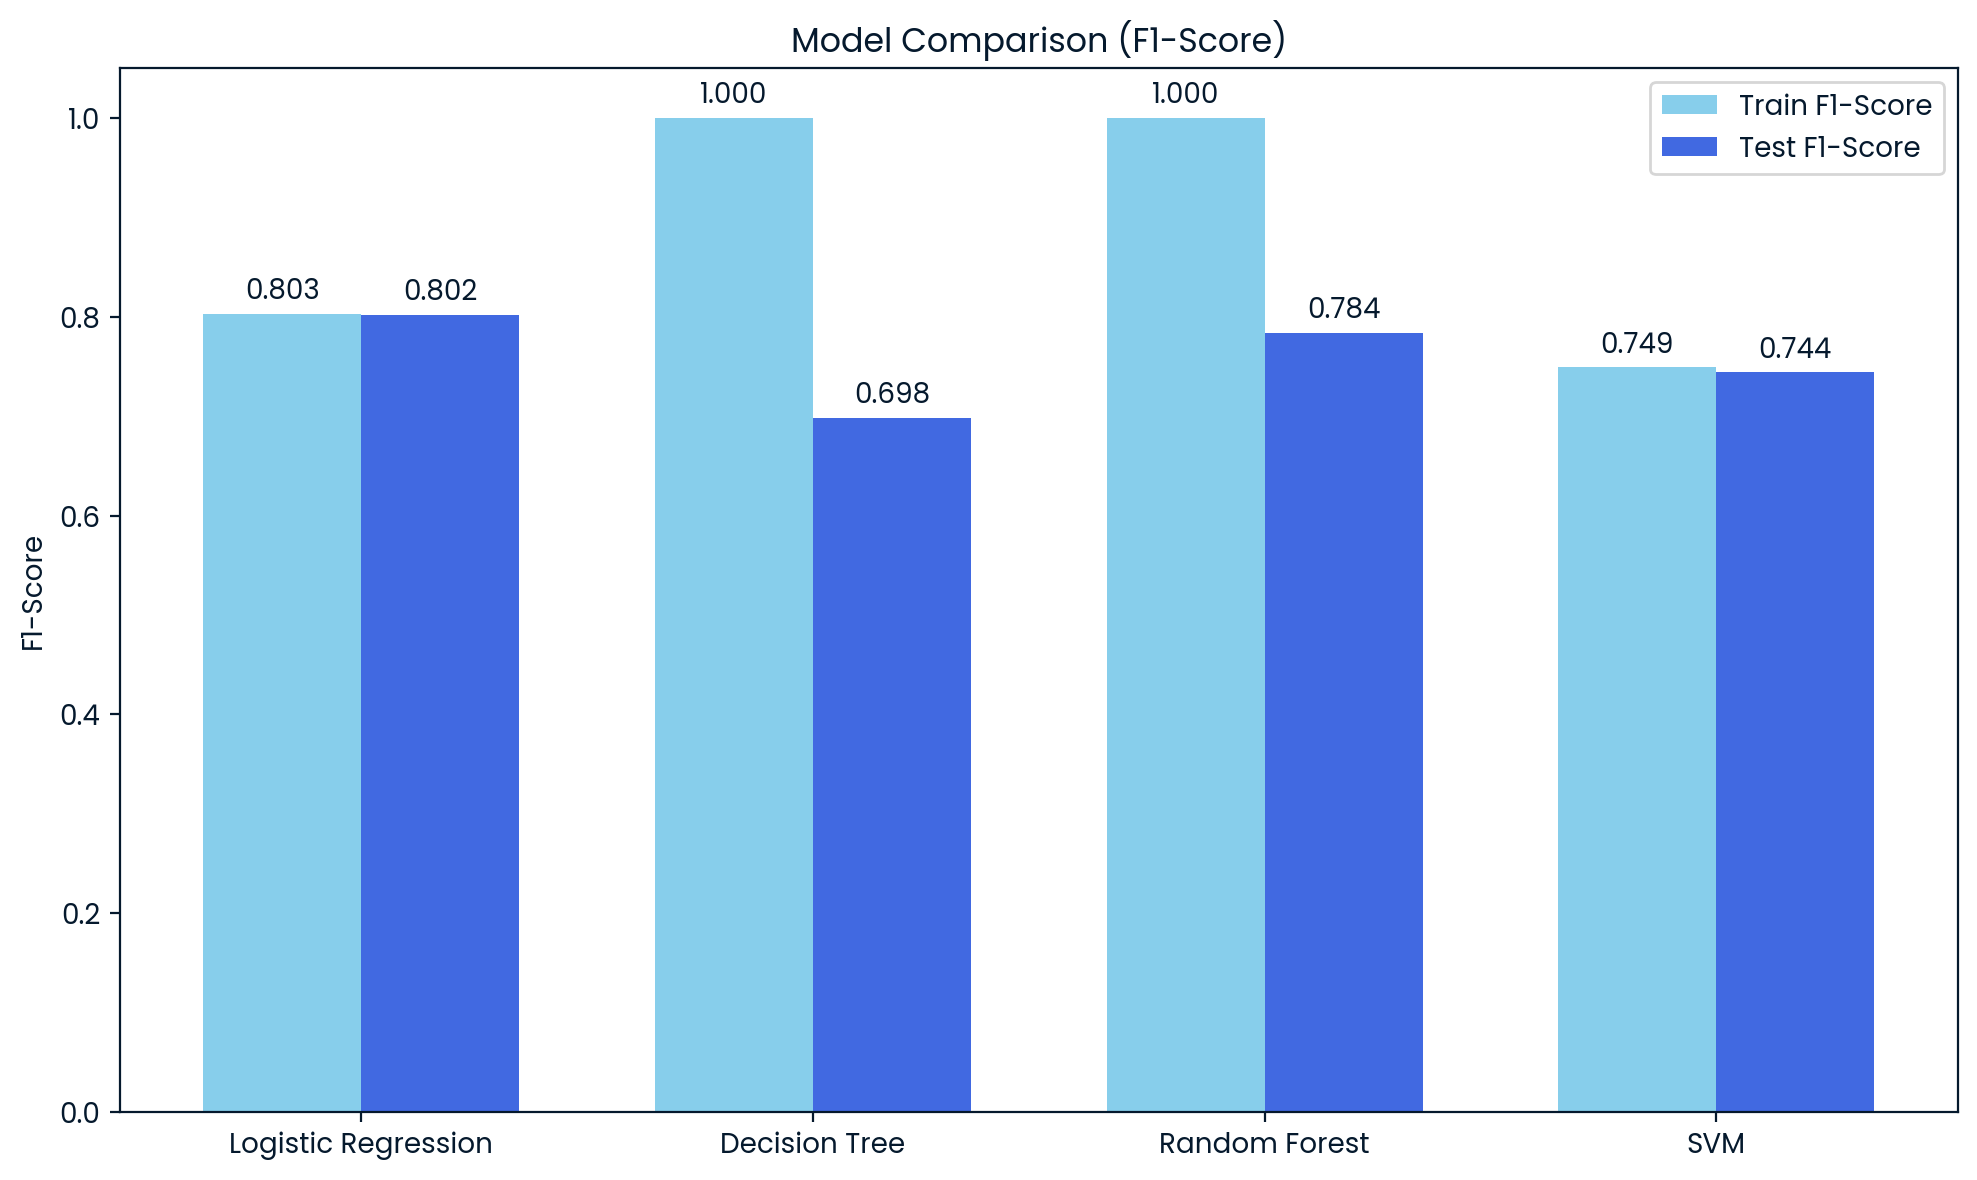

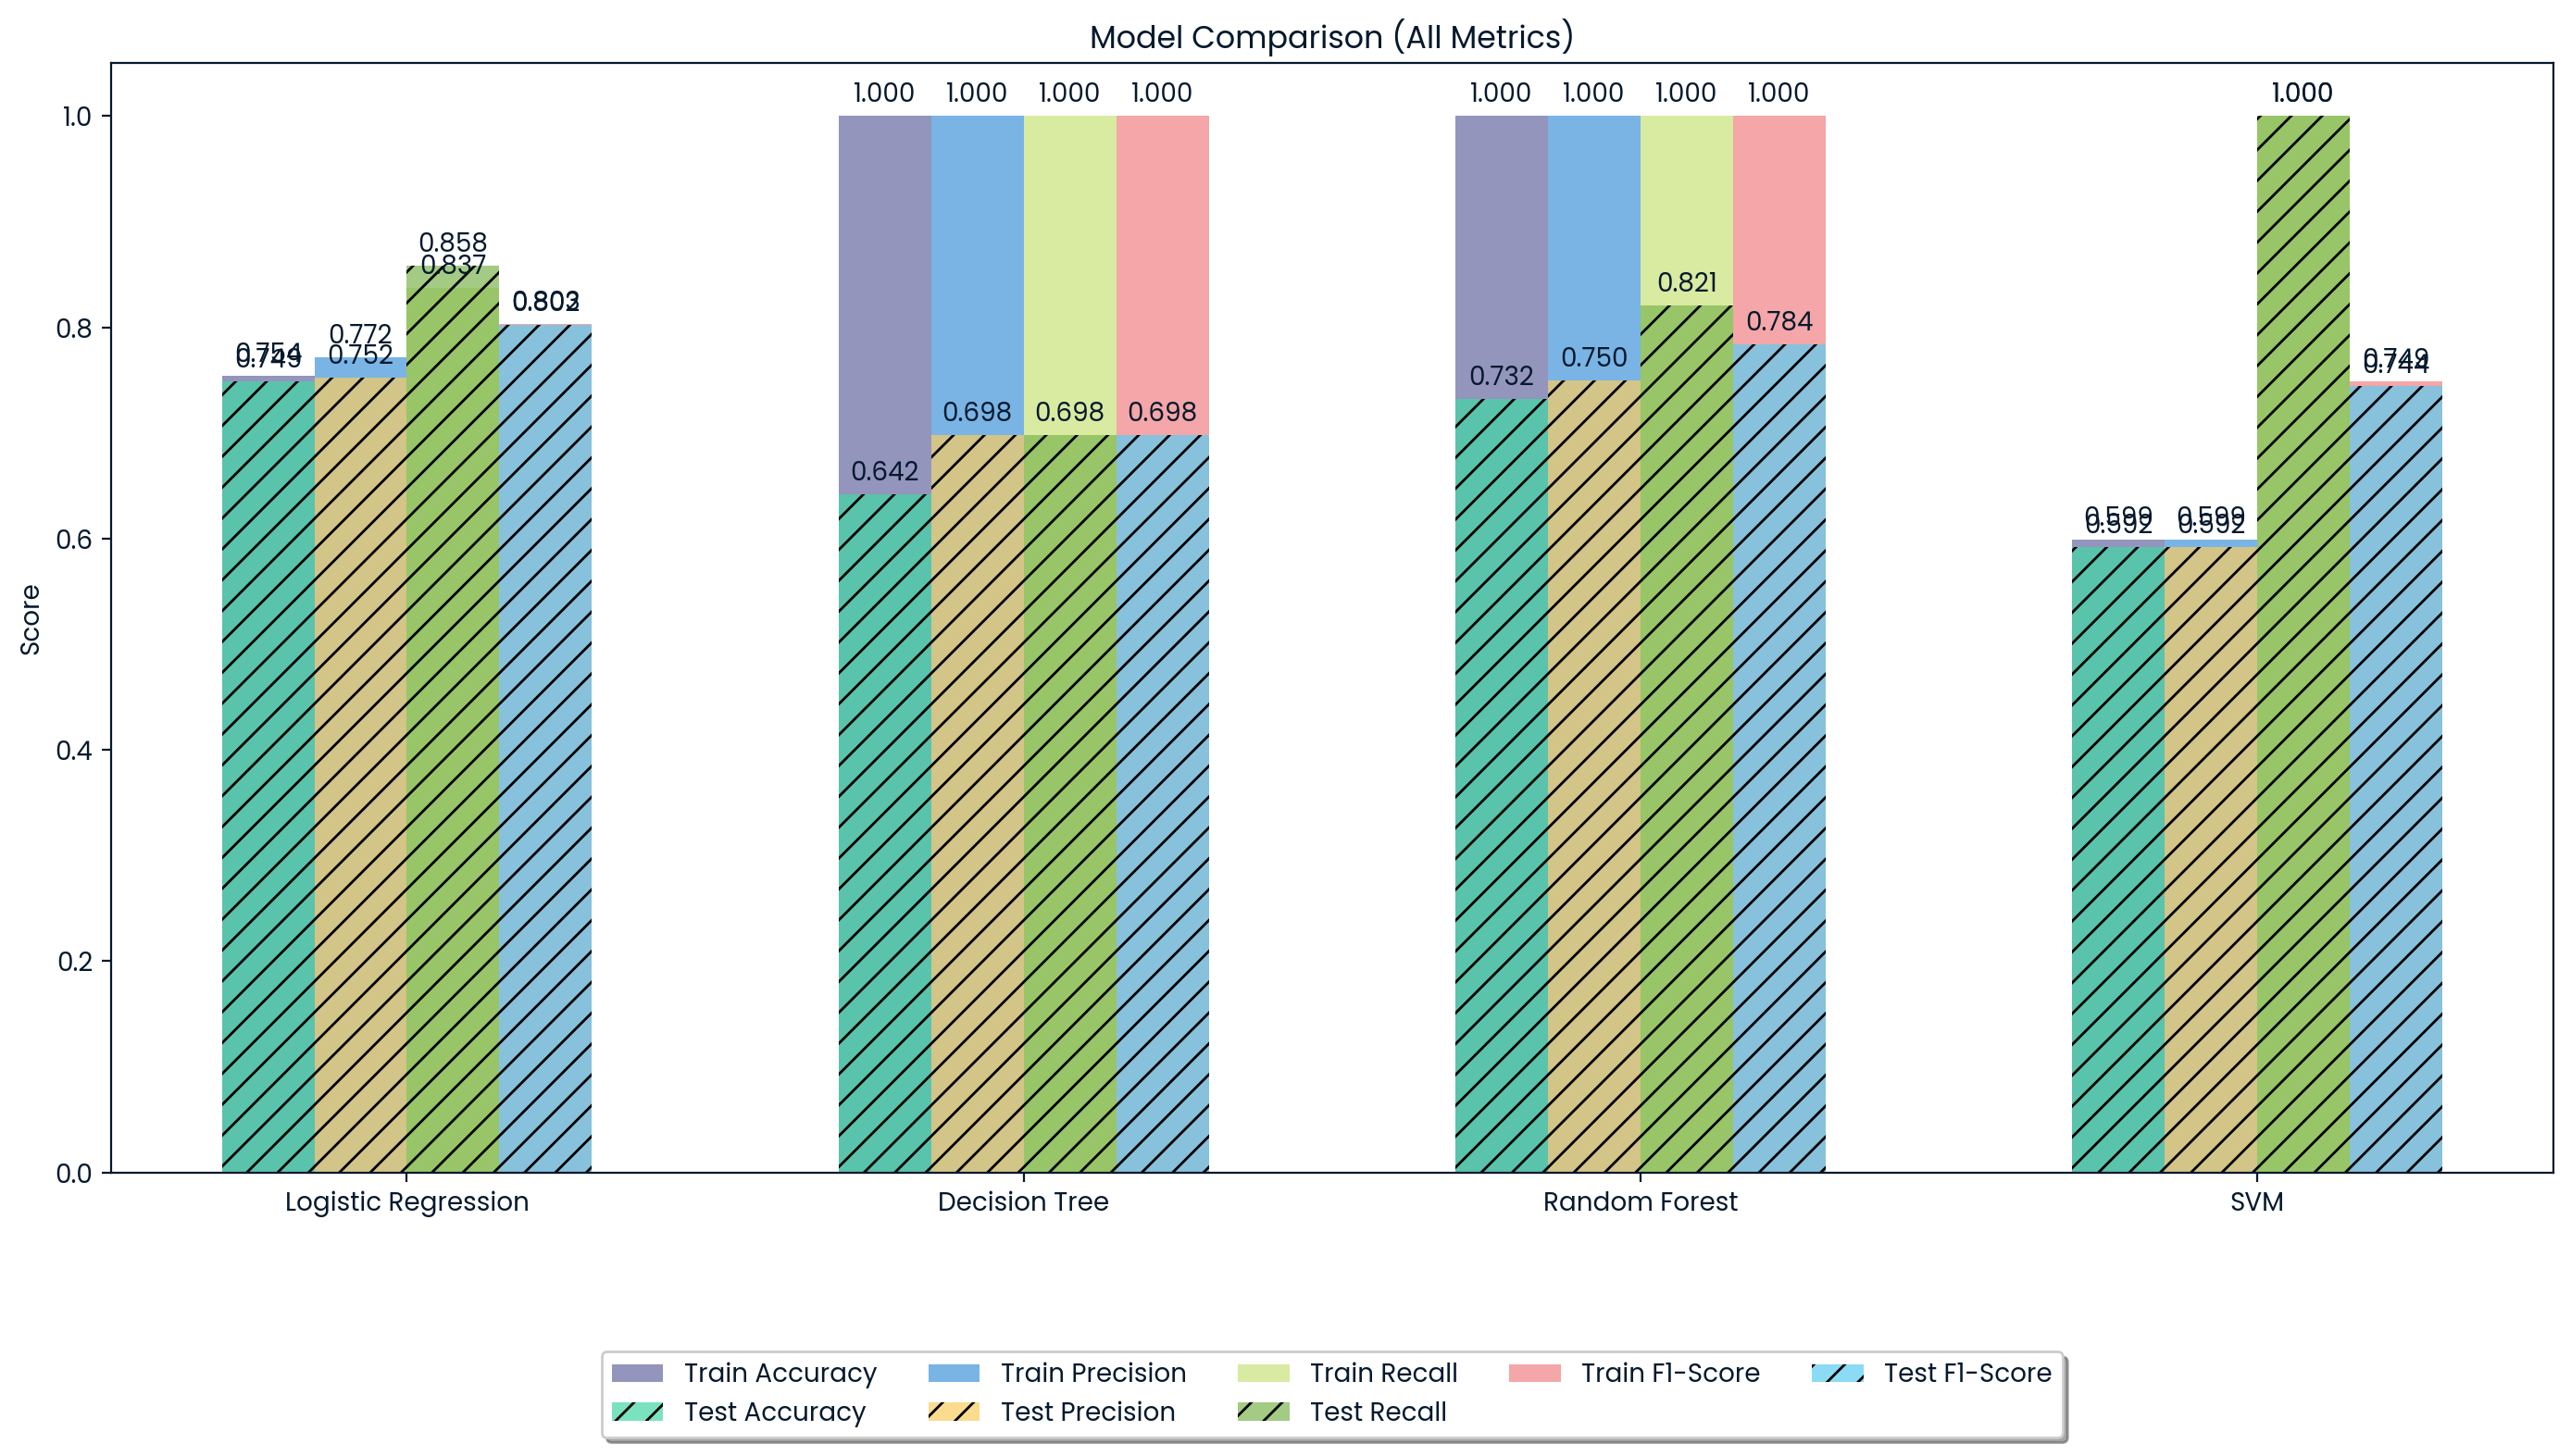

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Your provided data
results = {
    "Logistic Regression": {
        "train": {"Accuracy": 0.754, "Precision": 0.772, "Recall": 0.837, "F1-Score": 0.803},
        "test": {"Accuracy": 0.749, "Precision": 0.752, "Recall": 0.858, "F1-Score": 0.802},
    },
    "Decision Tree": {
        "train": {"Accuracy": 1.000, "Precision": 1.000, "Recall": 1.000, "F1-Score": 1.000},
        "test": {"Accuracy": 0.642, "Precision": 0.698, "Recall": 0.698, "F1-Score": 0.698},
    },
    "Random Forest": {
        "train": {"Accuracy": 1.000, "Precision": 1.000, "Recall": 1.000, "F1-Score": 1.000},
        "test": {"Accuracy": 0.732, "Precision": 0.750, "Recall": 0.821, "F1-Score": 0.784},
    },
    "SVM": {
        "train": {"Accuracy": 0.599, "Precision": 0.599, "Recall": 1.000, "F1-Score": 0.749},
        "test": {"Accuracy": 0.592, "Precision": 0.592, "Recall": 1.000, "F1-Score": 0.744},
    },
}

metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
models = list(results.keys())

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, [results[model]["train"][metric] for model in models for metric in metrics if metric == "F1-Score"], width, label='Train F1-Score', color = 'skyblue')
rects2 = ax.bar(x + width/2, [results[model]["test"][metric] for model in models for metric in metrics if metric == "F1-Score"], width, label='Test F1-Score', color = 'royalblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('F1-Score')
ax.set_title('Model Comparison (F1-Score)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.3f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

# Create a combined bar chart for all metrics

x = np.arange(len(models))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

for i, metric in enumerate(metrics):
    train_values = [results[model]["train"][metric] for model in models]
    test_values = [results[model]["test"][metric] for model in models]
    offset = width * (i - 1.5)  # Calculate offset for each metric
    rects_train = ax.bar(x + offset, train_values, width, label=f'Train {metric}',alpha=0.7)
    rects_test = ax.bar(x + offset, test_values, width, label=f'Test {metric}', hatch = '//',alpha=0.7)
    autolabel(rects_train)
    autolabel(rects_test)


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Model Comparison (All Metrics)')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=True, shadow=True, ncol=5)
fig.tight_layout()
plt.show()

## Step 5: Business Metrics:
------------------------
Since the goal is to predict "high-traffic" recipes, we need to define what "high traffic" means in business terms. Let's assume two scenarios:

**Scenario 1: Website Views/Visits**

*   **Definition of High Traffic:** A recipe is considered high-traffic if it receives more than X views/visits per week/month (e.g., X = 1000 views per week).
*   **Business Metric:** Total views/visits generated by the recipes predicted as "high-traffic."
*   **Model's Impact:** The model aims to *maximize* the total views/visits by accurately identifying recipes likely to attract high traffic, which can then be promoted or featured.

**Scenario 2: Ad Revenue/Conversions**

*   **Definition of High Traffic:** High traffic leads to more ad impressions or conversions (e.g., clicks on ads, recipe saves, newsletter sign-ups).
*   **Business Metric:** Total ad revenue generated or total number of conversions attributed to recipes predicted as "high-traffic."
*   **Model's Impact:** The model aims to *maximize* ad revenue or conversions by correctly identifying high-traffic recipes, which can then be strategically monetized.

**Describing Model Performance in Business Terms (Example using Scenario 1):**

Let's assume the Logistic Regression model predicts 100 recipes as "high-traffic" in a given week. By tracking actual website data, we find that these 100 recipes generated 85,000 views.

*   **Business-Oriented Metric:** "The Logistic Regression model helped identify recipes that generated 85,000 views this week. If the average view per recipe is 500, this means the model effectively highlighted 170 potential high-traffic recipes (85,000 / 500), even though it only predicted 100."
*   **Comparison to Baseline:** If, without the model, the business only featured random recipes that generated 50,000 views in the same period, we can say: "The Logistic Regression model increased website traffic by 70% (35,000/50,000 * 100) compared to the baseline."
*   **Cost-Benefit Analysis:** If promoting/featuring recipes has a cost (e.g., marketing spend), compare the increased views/revenue to the cost to determine the return on investment (ROI).


## Step 6: **Final Summary and Business Recommendations:**
------------------------
## **Summary:**

Of the four models evaluated, **Logistic Regression** demonstrates the most promising results. It shows reasonable accuracy and F1-score on the test set without significant overfitting. This suggests it generalizes well to unseen data and is the best choice among the evaluated models for predicting high-traffic recipes.

The **Decision Tree and Random Forest** models suffer from severe overfitting, making them unsuitable for deployment in their current form. Techniques like pruning (for Decision Tree), limiting tree depth, or increasing the number of trees (for Random Forest) could be explored to mitigate overfitting if these models were to be pursued further.

The **SVM** model's behavior of predicting all instances as positive is problematic. This could be due to issues like:

*   **Class Imbalance:** If the dataset has a significant class imbalance (many more high-traffic or non-high-traffic recipes), the SVM might be biased towards the majority class.
*   **Feature Scaling:** SVMs are sensitive to feature scaling. Scaling the features (e.g., using StandardScaler or MinMaxScaler) could improve performance.
*   **Kernel Selection/Hyperparameter Tuning:** The choice of kernel (linear, RBF, polynomial) and other hyperparameters can significantly impact SVM performance. Tuning these parameters using techniques like GridSearchCV or RandomizedSearchCV might resolve the issue.

--------------------
**Recommendations:** Based on the analysis, we recommend:
--------------------
*   Focus on the Logistic Regression model as the current best performer.
*   If exploring other models is desired, address overfitting in Decision Tree and Random Forest through techniques mentioned above.
*   Investigate the SVM's unusual behavior by checking for class imbalance, scaling features, and tuning hyperparameters.

Further steps might include more extensive hyperparameter tuning for Logistic Regression, feature selection, or trying other algorithms like Gradient Boosting Machines (GBM) for potentially better performance.
1.  **Deploy the Logistic Regression model:** Implement the Logistic Regression model to identify and feature high-traffic recipes on the website/app.
2.  **A/B Testing:** Conduct A/B testing to compare the model's performance against the existing strategy. Track the key business metric (views/revenue/conversions) for both groups.
3.  **Refine "High Traffic" Definition:** Continuously analyze website data to refine the definition of "high traffic." This may involve adjusting the threshold (X views/visits) based on seasonal trends or changes in user behavior.
4.  **Monitor and Retrain:** Regularly monitor the model's performance and retrain it with updated data to maintain accuracy and adapt to evolving trends.
5.  **Explore Feature Engineering:** Consider adding more relevant features (e.g., recipe ratings, user reviews, seasonality indicators) to potentially improve model performance.
6.  **Investigate SVM:** Address the SVM’s issues by feature scaling, hyperparameter tuning, and checking for class imbalance. It could be a valuable model if these problems are solved.

By connecting model performance to tangible business outcomes and continuously monitoring and improving the model, the business can leverage machine learning to effectively drive growth and achieve its objectives.



## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation